# **Prepare Data**

## **Import Library**

In [1]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


## **Checking Outliers**

### **Visualisasi Outliers**

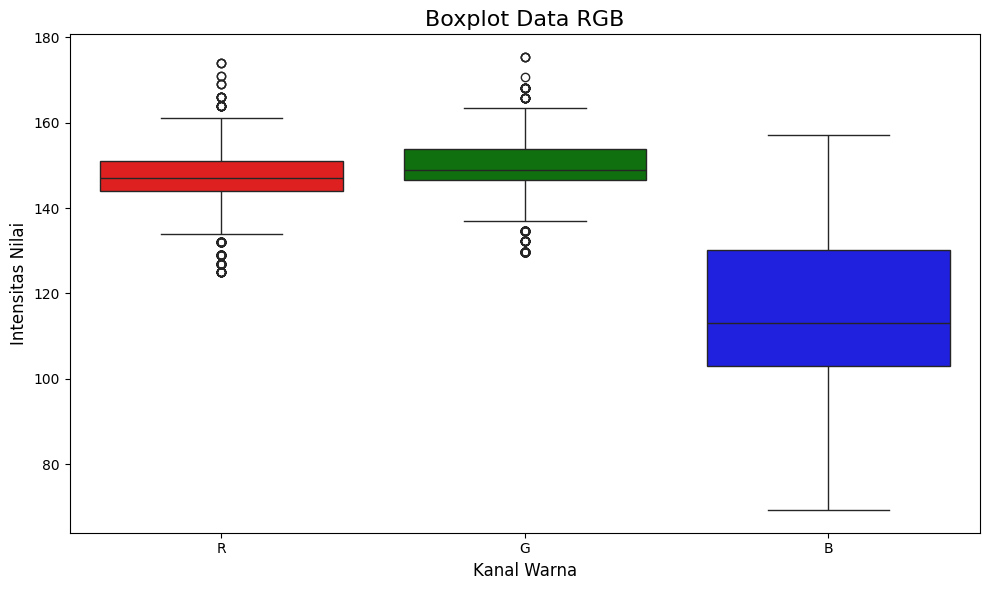

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


### **Mengatasi Outliers**

In [5]:

# Fungsi seteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Deteksi outlier pada data RGB
outliers_R = detect_outliers_iqr(df['R'])
outliers_G = detect_outliers_iqr(df['G'])
outliers_B = detect_outliers_iqr(df['B'])

print("Outliers in R:", outliers_R)
print("Outliers in G:", outliers_G)
print("Outliers in B:", outliers_B)

Outliers in R: 33      164
55      164
73      164
254     132
255     129
       ... 
1215    164
1222    171
1229    174
1257    164
1263    164
Name: R, Length: 158, dtype: int64
Outliers in G: 27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Outliers in B: Series([], Name: B, dtype: float64)


In [6]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Menghapus outlier dari salinan DataFrame
df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# Menampilkan jumlah data sebelum dan sesudah pembersihan
print("Jumlah data sebelum pembersihan:", len(df))
print("Jumlah data setelah pembersihan:", len(df_cleaned))

Jumlah data sebelum pembersihan: 1441
Jumlah data setelah pembersihan: 1242


## **Preprocessing**

### **Normalisasi**

In [7]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [8]:
df_norm=normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


### **Perbandingan Kanal**

In [9]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R_G_ratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G_B_ratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [10]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


### **Mencari Nilai HSV**

In [11]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df_rasio.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [12]:
df_hsv=rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


### **Mencari Nilai Lab**

#### **Hitung Manual**

In [13]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df_hsv.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [14]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [15]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R_G_ratio         1441 non-null   float64
 10  G_B_ratio         1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


#### **Hitung Dengan Library OpenCV**

In [16]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df_hsv.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [17]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


# **Klasifikasi**

## **Import Library**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
import warnings

In [19]:
# Matikan FutureWarning, ConvergenceWarning, dan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## **Mempersiapkan Data**

<Axes: xlabel='Perlakuan'>

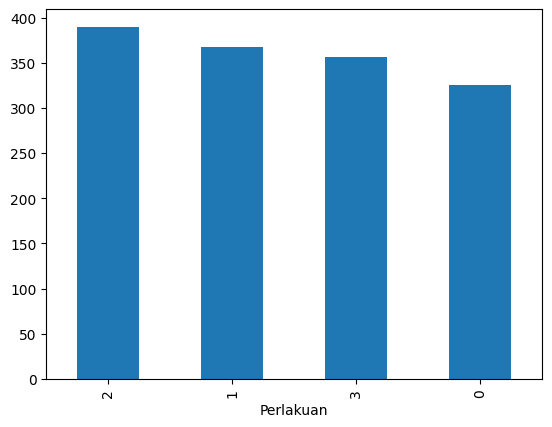

In [20]:
# Check Imbalance
df_cv['Perlakuan'].value_counts().plot(kind='bar')

In [21]:
def prepare_data_variasi_fitur(df):
    # Definisi grup fitur
    grup_fitur = {
        'semua_fitur': ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb'],
        'RGB': ['R', 'G', 'B'],
        'rgb': ['r', 'g', 'b'],
        'HSV': ['H', 'S', 'V'],
        'CLab': ['cL', 'ca', 'cb'],
        'R/G_ratio': ['R_G_ratio'],
        'G/B_ratio': ['G_B_ratio'],
        
    }
    
    kombinasi_grup = {
    'Full': grup_fitur['semua_fitur'],
    'RGB': grup_fitur['RGB'],
    'rgb': grup_fitur['rgb'],
    'HSV': grup_fitur['HSV'],
    'CLab': grup_fitur['CLab'],
    'RGB_HSV': grup_fitur['RGB'] + grup_fitur['HSV'],
    'RGB_CLab': grup_fitur['RGB'] + grup_fitur['CLab'],
    'HSV_CLab': grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_R/G_ratio': grup_fitur['RGB'] + grup_fitur['R/G_ratio'],
    'RGB_G/B_ratio': grup_fitur['RGB'] + grup_fitur['G/B_ratio'],
    'rgb_HSV': grup_fitur['rgb'] + grup_fitur['HSV'],
    'rgb_CLab': grup_fitur['rgb'] + grup_fitur['CLab'],
    'HSV_R/G_ratio': grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'HSV_G/B_ratio': grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'CLab_R/G_ratio': grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'CLab_G/B_ratio': grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_CLab': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_R/G_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'RGB_HSV_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_CLab': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'rgb_R/G_ratio_G/B_ratio': grup_fitur['rgb'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_R/G_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'rgb_HSV_G/B_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'CLab_R/G_ratio_G/B_ratio': grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'CLab_HSV_R/G_ratio': grup_fitur['CLab'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'CLab_HSV_G/B_ratio': grup_fitur['CLab'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'RGB_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'rgb_CLab_R/G_ratio': grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'rgb_CLab_G/B_ratio': grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'],
    'RGB_rgb_CLab': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'],
    'RGB_rgb_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_rgb': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['rgb'],
    'RGB_HSV_CLab_rgb': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['rgb'],
    'RGB_HSV_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_HSV_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_rgb_HSV_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_HSV_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_CLab_R/G_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'rgb_HSV_CLab_G/B_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_CLab_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_HSV_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    }

    hasil = {}
    
    for nama_grup, fitur in kombinasi_grup.items():
        X = df[fitur]
        y = df['Perlakuan']
        
        # Membagi data menjadi set pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Preprocessing untuk ANN: MinMaxScaler
        scaler_ann = MinMaxScaler()
        X_train_ann = scaler_ann.fit_transform(X_train)
        X_test_ann = scaler_ann.transform(X_test)
        
        # Preprocessing untuk AdaBoost SVM: StandardScaler
        scaler_svm = StandardScaler()
        X_train_svm = scaler_svm.fit_transform(X_train)
        X_test_svm = scaler_svm.transform(X_test)
        
        # Preprocessing untuk AdaBoost DT: Tanpa scaling
        X_train_dt = X_train.values
        X_test_dt = X_test.values
        
        hasil[nama_grup] = {
            'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
            'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
            'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
            'y_train': y_train, 'y_test': y_test,
            'fitur': fitur
        }
        
        # print(f"Grup: {nama_grup}")
        # print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        # print(f"Fitur: {fitur}")
        # print(f"Jumlah data training: {X_train.shape[0]}")
        # print(f"Jumlah data testing: {X_test.shape[0]}\n")
    
    return hasil


In [22]:
data_prep = prepare_data_variasi_fitur(df_lab)

In [23]:
data_prep

{'Full': {'X_train_ann': array([[0.69387755, 0.63157895, 0.57692308, ..., 0.71464034, 0.49375129,
          0.59585219],
         [0.44897959, 0.47368421, 0.53846154, ..., 0.53109006, 0.43796772,
          0.53479077],
         [0.44897959, 0.78947368, 0.61538462, ..., 0.78420542, 0.16483824,
          0.58500265],
         ...,
         [0.44897959, 0.36842105, 0.26923077, ..., 0.42371721, 0.41009604,
          0.80114272],
         [0.48979592, 0.47368421, 0.80769231, ..., 0.57323013, 0.63378257,
          0.22807107],
         [0.        , 0.        , 0.03846154, ..., 0.00288569, 0.30311363,
          0.84480291]]),
  'X_test_ann': array([[0.3877551 , 0.42105263, 0.42307692, ..., 0.46386431, 0.38011832,
          0.63669891],
         [0.48979592, 0.42105263, 0.65384615, ..., 0.51373049, 0.59115581,
          0.38347589],
         [0.3877551 , 0.42105263, 0.69230769, ..., 0.49407231, 0.53591449,
          0.32293441],
         ...,
         [0.48979592, 0.47368421, 0.53846154, ..., 

## **Membangun Model**

### **Artiifical Neural Network (ANN)**

In [24]:
def train_ann(X_train, y_train, X_test, y_test, params=None, show_report=True):
    print("=== Melatih Model ANN ===")
    
    # Parameter default jika tidak disediakan
    default_params = {
        "hidden_layer_sizes": (100,50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,
        "learning_rate": "constant",
        "max_iter": 1000,
        "random_state": 42,
        "early_stopping": False,  # Sesuaikan dengan GridSearchCV
    }
    
    # Update parameter default dengan parameter yang diberikan
    if params:
        default_params.update(params)
    
    # Buat model dengan parameter yang disesuaikan
    ann = MLPClassifier(**default_params)
    ann.fit(X_train, y_train)
    
    y_pred = ann.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = ann.predict_proba(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    
    # Tampilkan classification report jika show_report bernilai True
    if show_report:
        print(f"Akurasi ANN: {acc:.4f}")
        print(classification_report(y_test, y_pred))
    
    return ann, y_pred, y_prob, acc, precision, recall, f1_score


In [25]:
# ann_model, y_pred_ann, y_prob_ann,acc_ann, prec_ann, rec_ann, f1_ann = train_ann(
#     data_prep['X_train_ann'], data_prep['y_train'],
#     data_prep['X_test_ann'], data_prep['y_test']
# )

### **Adaboost Decision Tree**

In [26]:
def train_adaboost_dt(X_train, y_train, X_test, y_test, params=None, show_report=True):
    print("\n=== Melatih Model AdaBoost dengan Decision Tree ===")
    
    # Parameter default jika tidak disediakan
    default_params = {
        "estimator": DecisionTreeClassifier(max_depth=3, random_state=42),
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }
    
    # Update parameter default dengan parameter yang diberikan
    if params:
        default_params.update(params)
    
    # Buat model dengan parameter yang disesuaikan
    adaboost_dt = AdaBoostClassifier(**default_params)
    adaboost_dt.fit(X_train, y_train)
    
    # Prediksi dan evaluasi
    y_pred = adaboost_dt.predict(X_test)
    y_prob = adaboost_dt.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Tampilkan akurasi dan classification report jika show_report bernilai True
    if show_report:
        print(f"Akurasi AdaBoost (DT): {acc:.4f}")
        print(classification_report(y_test, y_pred))
    
    return adaboost_dt, y_pred, y_prob, acc, precision, recall, f1_score

In [27]:
# adaboost_dt_model, y_pred_adaboost_dt, y_prob_ada_dt,acc_adaboost_dt, prec_adaboost_dt, rec_adaboost_dt, f1_adaboost_dt = train_adaboost_dt(
#     data_prep['X_train_dt'], data_prep['y_train'], 
#     data_prep['X_test_dt'], data_prep['y_test']
# )

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [28]:
def train_adaboost_svm(X_train, y_train, X_test, y_test, params=None, show_report=True):
    print("\n=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")
    
    # Parameter default jika tidak disediakan
    default_params = {
        "estimator": SVC(kernel='rbf', probability=True, random_state=42),
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }
    
    # Update parameter default dengan parameter yang diberikan
    if params:
        default_params.update(params)
    
    # Buat model dengan parameter yang disesuaikan
    adaboost_svm = AdaBoostClassifier(**default_params)
    adaboost_svm.fit(X_train, y_train)
    
    # Prediksi dan evaluasi
    y_pred = adaboost_svm.predict(X_test)
    y_prob = adaboost_svm.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Tampilkan akurasi dan classification report jika show_report bernilai True
    if show_report:
        print(f"Akurasi AdaBoost (SVM): {acc:.4f}")
        print(classification_report(y_test, y_pred))
    
    return adaboost_svm, y_pred, y_prob, acc, precision, recall, f1_score

In [29]:
# adaboost_svm_model, y_pred_adaboost_svm, y_prob_ada_svm, acc_adaboost_svm, prec_adaboost_svm, rec_adaboost_svm, f1_adaboost_svm = train_adaboost_svm(
#     data_prep['X_train_svm'], data_prep['y_train'], 
#     data_prep['X_test_svm'], data_prep['y_test']
# )

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [30]:
def train_bagging_svm(X_train, y_train, X_test, y_test, params=None, show_report=True):
    print("\n=== Melatih Model Bagging dengan SVM RBF Kernel ===")
    
    # Parameter default jika tidak disediakan
    default_params = {
        "estimator": SVC(kernel='rbf', probability=True, random_state=42),
        "n_estimators": 50,
        "random_state": 42,
        "n_jobs": -1,
    }
    
    # Update parameter default dengan parameter yang diberikan
    if params:
        default_params.update(params)
    
    # Buat model dengan parameter yang disesuaikan
    bagging_svm = BaggingClassifier(**default_params)
    bagging_svm.fit(X_train, y_train)
    
    # Prediksi dan evaluasi
    y_pred = bagging_svm.predict(X_test)
    y_prob = bagging_svm.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Tampilkan akurasi dan classification report jika show_report bernilai True
    if show_report:
        print(f"Akurasi Bagging (SVM): {acc:.4f}")
        print(classification_report(y_test, y_pred))
    
    return bagging_svm, y_pred, y_prob, acc, precision, recall, f1_score

In [31]:
# bagging_svm_model, y_pred_bagging_svm, y_prob_bag_svm, acc_bagging_svm, prec_bagging_svm, rec_bagging_svm, f1_bagging_svm = train_bagging_svm(
#     data_prep['X_train_svm'], data_prep['y_train'], 
#     data_prep['X_test_svm'], data_prep['y_test']
# )

## **Training dan Evaluasi Model**

In [32]:
def evaluate_single_model(feature_groups, model_func, model_name):
    results = {}
    metrics_data = []

    # Validasi key yang diperlukan
    required_keys = ['X_train_ann', 'X_test_ann', 'X_train_svm', 'X_test_svm', 'X_train_dt', 'X_test_dt', 'y_train', 'y_test']
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Mapping untuk preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': ('X_train_ann', 'X_test_ann'),
        'AdaBoost DT': ('X_train_dt', 'X_test_dt'),
        'AdaBoost SVM': ('X_train_svm', 'X_test_svm'),
        'Bagging SVM': ('X_train_svm', 'X_test_svm'),
    }

    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        y_train = data['y_train']
        y_test = data['y_test']

        if model_name in model_preprocessing_map:
            X_train_key, X_test_key = model_preprocessing_map[model_name]
            model, y_pred, y_prob, acc, precision, recall, f1 = model_func(data[X_train_key], y_train, data[X_test_key], y_test)
        else:
            raise ValueError(f"Model {model_name} tidak dikenali.")

        results[group_name] = {
            'model': model,
            'y_pred': y_pred,
            'y_prob': y_prob,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
    metrics_df.reset_index(drop=True, inplace=True)

    # # Simpan DataFrame ke file (opsional)
    # metrics_df.to_csv(f"metrics_{model_name}.csv", index=False)
    # print(f"Evaluasi selesai untuk {model_name}. DataFrame disimpan ke file metrics_{model_name}.csv.")

    return results, metrics_df


### **Artiﬁcial Neural Network (ANN)**

In [33]:
results_ann, metrics_df_ann = evaluate_single_model(
    data_prep, train_ann, 'ANN'
)


=== Mengolah Grup Fitur: Full dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.5681
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        96
           1       0.40      0.39      0.39       114
           2       0.39      0.59      0.47       106
           3       0.97      0.62      0.76       117

    accuracy                           0.57       433
   macro avg       0.63      0.57      0.59       433
weighted avg       0.63      0.57      0.58       433


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.5404
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        96
           1       0.34      0.39      0.37       114
           2       0.38      0.50      0.43       106
           3       0.95      0.62      0.75       117

    accuracy                           0.54       433
   macro avg       0.60      0.54      0.5

#### **Perbandingan Hasil ANN**

In [34]:
metrics_df_ann

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,Full,ANN,0.568129,0.632675,0.568129,0.584381
1,RGB_rgb_CLab_R/G_ratio,ANN,0.563510,0.617246,0.563510,0.578129
2,rgb_CLab_R/G_ratio,ANN,0.563510,0.630362,0.563510,0.571639
3,RGB_CLab_R/G_ratio,ANN,0.563510,0.630362,0.563510,0.571639
4,RGB_R/G_ratio_G/B_ratio,ANN,0.561201,0.620214,0.561201,0.575597
5,RGB_HSV_rgb,ANN,0.561201,0.628571,0.561201,0.574580
6,rgb_R/G_ratio_G/B_ratio,ANN,0.561201,0.620214,0.561201,0.575597
7,RGB_rgb_HSV_CLab_G/B_ratio,ANN,0.558891,0.629226,0.558891,0.572515
8,rgb_HSV_CLab_R/G_ratio,ANN,0.558891,0.612855,0.558891,0.571422
9,RGB_HSV_CLab_R/G_ratio,ANN,0.558891,0.612855,0.558891,0.571422


### **Adaboost Decision Tree**

In [35]:
result_adaboost_dt, metrics_df_adaboost_dt = evaluate_single_model(
    data_prep, train_adaboost_dt, 'AdaBoost DT'
)


=== Mengolah Grup Fitur: Full dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5797
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        96
           1       0.47      0.55      0.51       114
           2       0.62      0.58      0.60       106
           3       0.64      0.54      0.59       117

    accuracy                           0.58       433
   macro avg       0.59      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.4503
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        96
           1       0.47      0.40      0.43       114
           2       0.50      0.48      0.49       106
           3       0.48      0.42      0.45       117

    ac

#### **Perbandingan Hasil Adaboost Decision Tree**

In [36]:
metrics_df_adaboost_dt

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost DT,0.639723,0.637680,0.639723,0.637081
1,rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.639723,0.641243,0.639723,0.635537
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.637413,0.642331,0.637413,0.633391
3,RGB_HSV_CLab_R/G_ratio,AdaBoost DT,0.637413,0.638242,0.637413,0.633084
4,RGB_rgb_HSV_R/G_ratio,AdaBoost DT,0.635104,0.636787,0.635104,0.634990
5,RGB_CLab_G/B_ratio,AdaBoost DT,0.628176,0.639575,0.628176,0.630431
6,rgb_CLab_G/B_ratio,AdaBoost DT,0.628176,0.639575,0.628176,0.630431
7,RGB_rgb_HSV,AdaBoost DT,0.625866,0.623852,0.625866,0.624384
8,RGB_rgb_CLab_G/B_ratio,AdaBoost DT,0.623557,0.634330,0.623557,0.626110
9,HSV_G/B_ratio,AdaBoost DT,0.621247,0.622595,0.621247,0.618288


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [37]:
result_aboost_svm, metrics_df_adaboost_svm = evaluate_single_model(
    data_prep, train_adaboost_svm, 'AdaBoost SVM'
)


=== Mengolah Grup Fitur: Full dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.38      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.32      0.20      0.25        96
           1       0.00      0.00      0.00       114
           2       0.23      0.81      0.36       106
           3       0.00      0.00      0.00       117



#### **Perbandingan Hasil Adaboost SVM Kernel RBF**

In [38]:
metrics_df_adaboost_svm

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_HSV_CLab_rgb,AdaBoost SVM,0.353349,0.543205,0.353349,0.358069
1,rgb_HSV_CLab_G/B_ratio,AdaBoost SVM,0.348730,0.594148,0.348730,0.350332
2,RGB_HSV_CLab_G/B_ratio,AdaBoost SVM,0.348730,0.594148,0.348730,0.350332
3,RGB_rgb_CLab_R/G_ratio,AdaBoost SVM,0.339492,0.245313,0.339492,0.281323
4,rgb_CLab_R/G_ratio,AdaBoost SVM,0.309469,0.555051,0.309469,0.291367
5,CLab_R/G_ratio,AdaBoost SVM,0.293303,0.241450,0.293303,0.244504
6,RGB_rgb_HSV_CLab_G/B_ratio,AdaBoost SVM,0.286374,0.260022,0.286374,0.251457
7,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.281755,0.276754,0.281755,0.234367
8,RGB_rgb_G/B_ratio,AdaBoost SVM,0.279446,0.238624,0.279446,0.241377
9,HSV_G/B_ratio,AdaBoost SVM,0.274827,0.289156,0.274827,0.223263


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [39]:
result_bagging_svm, metrics_df_bagging_svm = evaluate_single_model(
    data_prep, train_bagging_svm, 'Bagging SVM'
)


=== Mengolah Grup Fitur: Full dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Akurasi Bagging (SVM): 0.5543
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        96
           1       0.36      0.36      0.36       114
           2       0.41      0.55      0.47       106
           3       0.90      0.66      0.76       117

    accuracy                           0.55       433
   macro avg       0.59      0.56      0.57       433
weighted avg       0.59      0.55      0.57       433


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Akurasi Bagging (SVM): 0.5612
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        96
           1       0.43      0.39      0.41       114
           2       0.39      0.59      0.47       106
           3       0.91      0.62      0.73       117

    ac

#### **Perbandingan Hasil Bagging SVM Kernel RBF**

In [40]:
metrics_df_bagging_svm

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_rgb_R/G_ratio,Bagging SVM,0.588915,0.635178,0.588915,0.597493
1,RGB_R/G_ratio,Bagging SVM,0.572748,0.613044,0.572748,0.582618
2,RGB_rgb_CLab_R/G_ratio,Bagging SVM,0.568129,0.612435,0.568129,0.581220
3,RGB_rgb_HSV_R/G_ratio,Bagging SVM,0.561201,0.601491,0.561201,0.573463
4,rgb,Bagging SVM,0.561201,0.614595,0.561201,0.574187
5,RGB,Bagging SVM,0.561201,0.614595,0.561201,0.574187
6,RGB_R/G_ratio_G/B_ratio,Bagging SVM,0.558891,0.598369,0.558891,0.569792
7,rgb_R/G_ratio_G/B_ratio,Bagging SVM,0.558891,0.598369,0.558891,0.569792
8,rgb_HSV_R/G_ratio,Bagging SVM,0.556582,0.592510,0.556582,0.567942
9,RGB_rgb_CLab,Bagging SVM,0.556582,0.603302,0.556582,0.569277


## **Confusion Matrix**

In [41]:
def visualize_top_feature_combinations(data_prep, results, metrics_df, model_name, top_n=4):

    # Filter top_n kombinasi fitur terbaik untuk model tertentu
    top_features_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Accuracy')
    top_feature_groups = top_features_df['Feature Group'].tolist()

    # Buat subplot untuk confusion matrix
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten untuk memudahkan akses

    for i, feature_group in enumerate(top_feature_groups):
        if i >= len(axes):  # Jika kombinasi fitur lebih dari subplot yang tersedia
            break

        # Ambil y_test dari data_prep
        y_test = data_prep[feature_group]['y_test']
        
        # Ambil y_pred dari results
        y_pred = results[feature_group]['y_pred']

        # Hitung confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Visualisasi confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {model_name}\nFeature Group: {feature_group}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    # Sembunyikan subplot yang tidak terisi jika top_n < 4
    for j in range(len(top_feature_groups), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### **Confusion Matrix ANN**

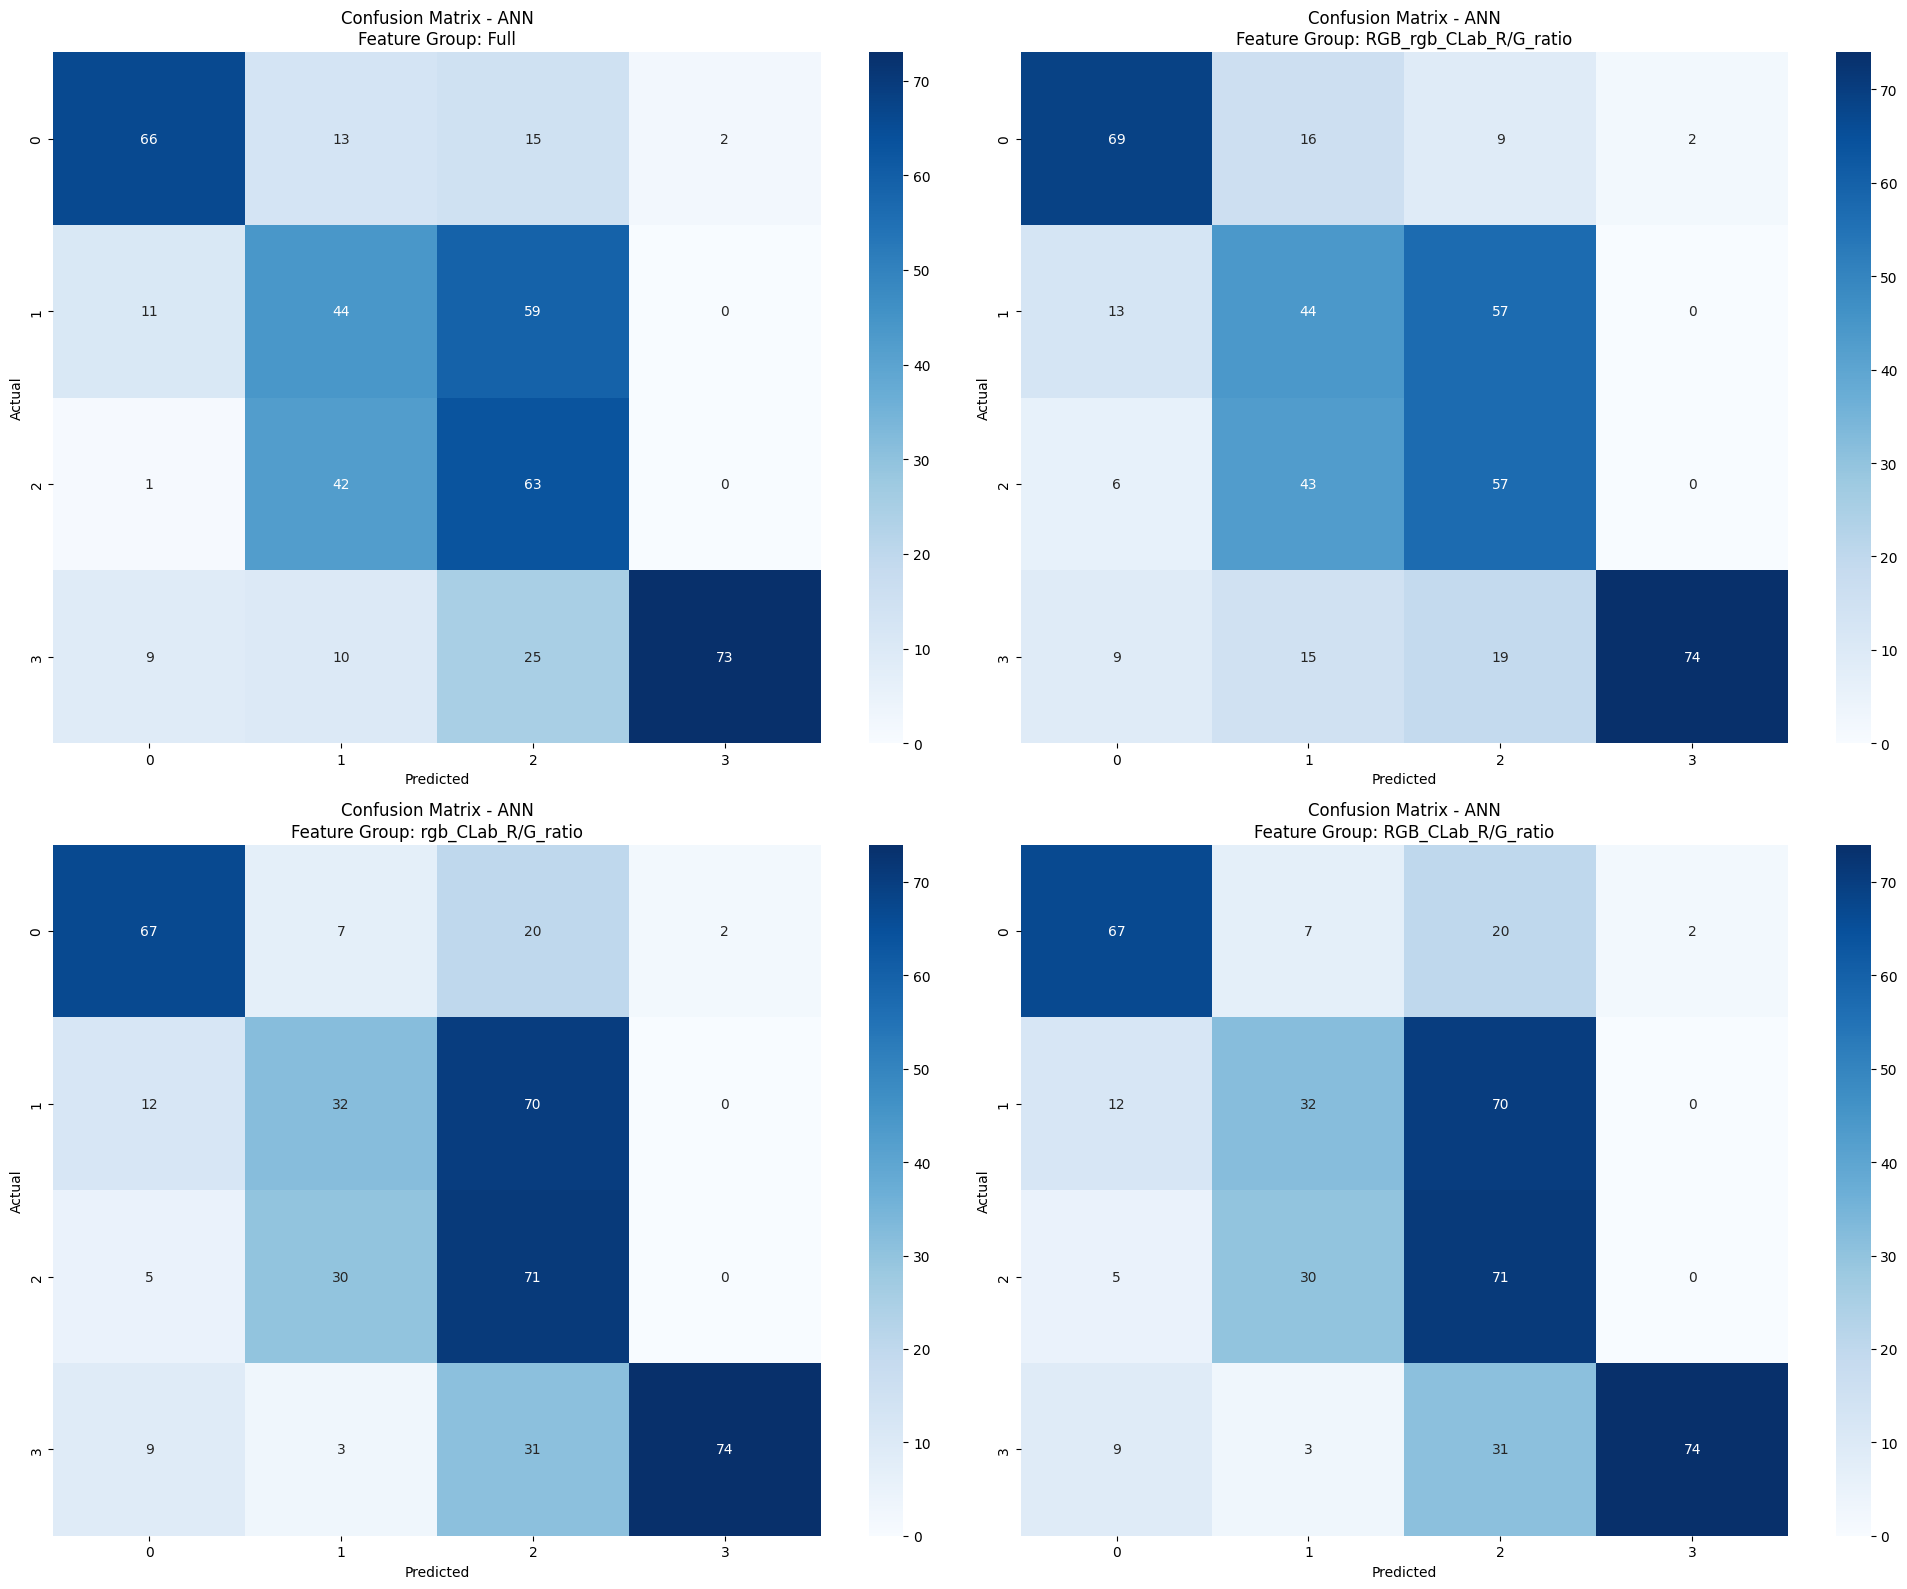

In [42]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=results_ann,
    metrics_df=metrics_df_ann,
    model_name='ANN',
)

### **Confusion Matrix Adaboost Decision Tree**

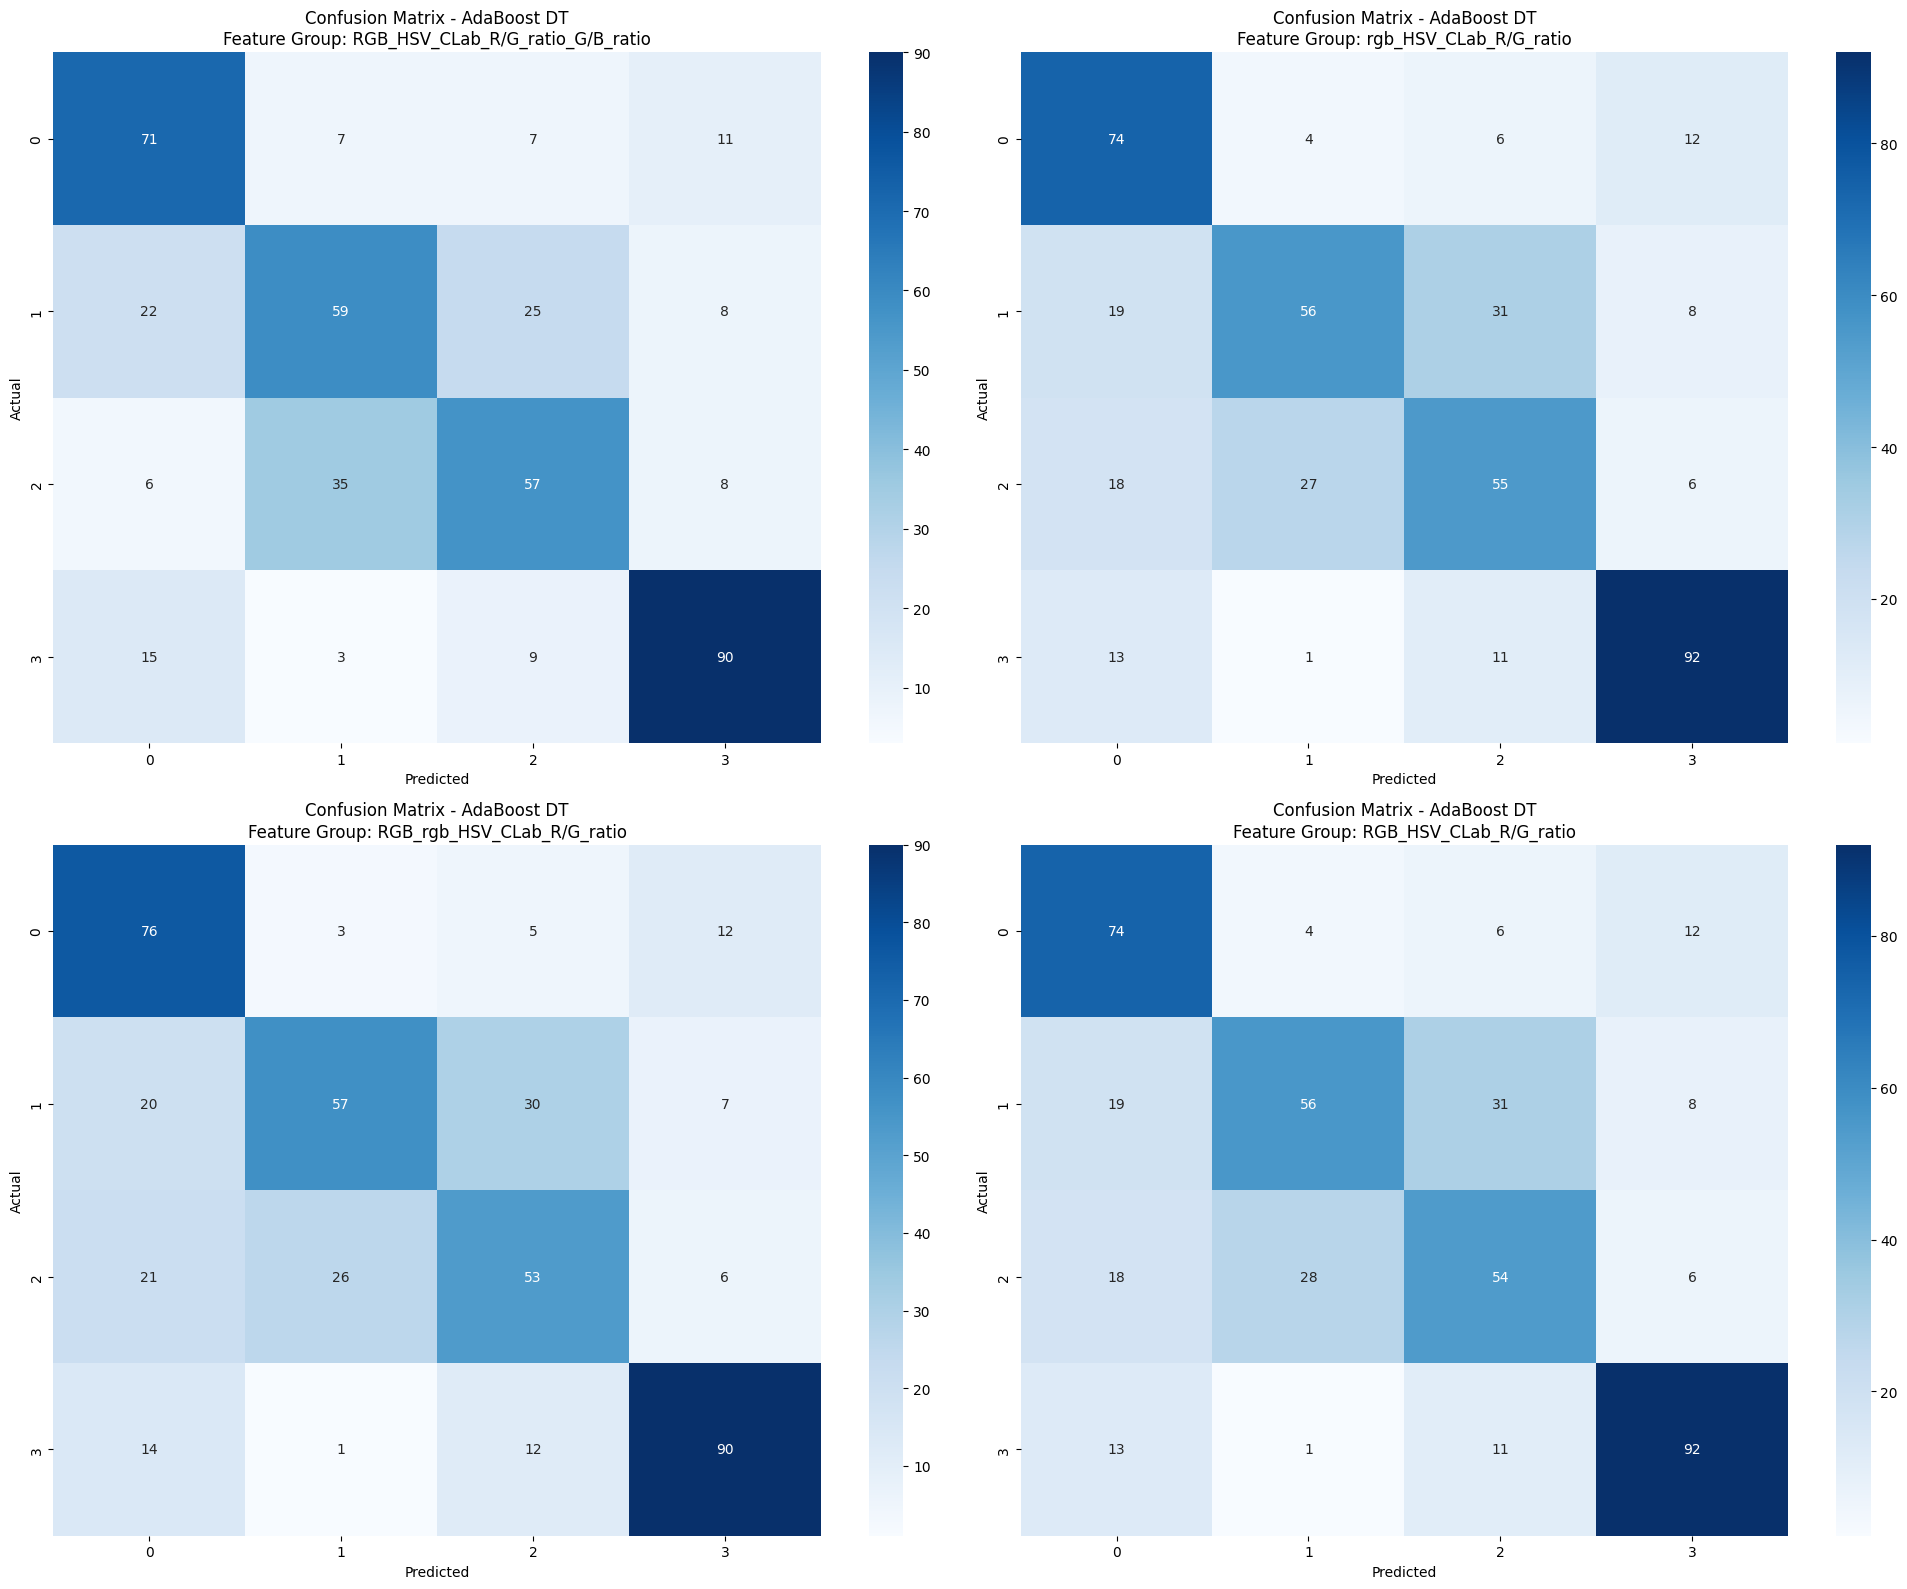

In [43]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=result_adaboost_dt,
    metrics_df=metrics_df_adaboost_dt,
    model_name='AdaBoost DT',
)

### **Confusion Matrix Adaboost SVM Kernel RBF**

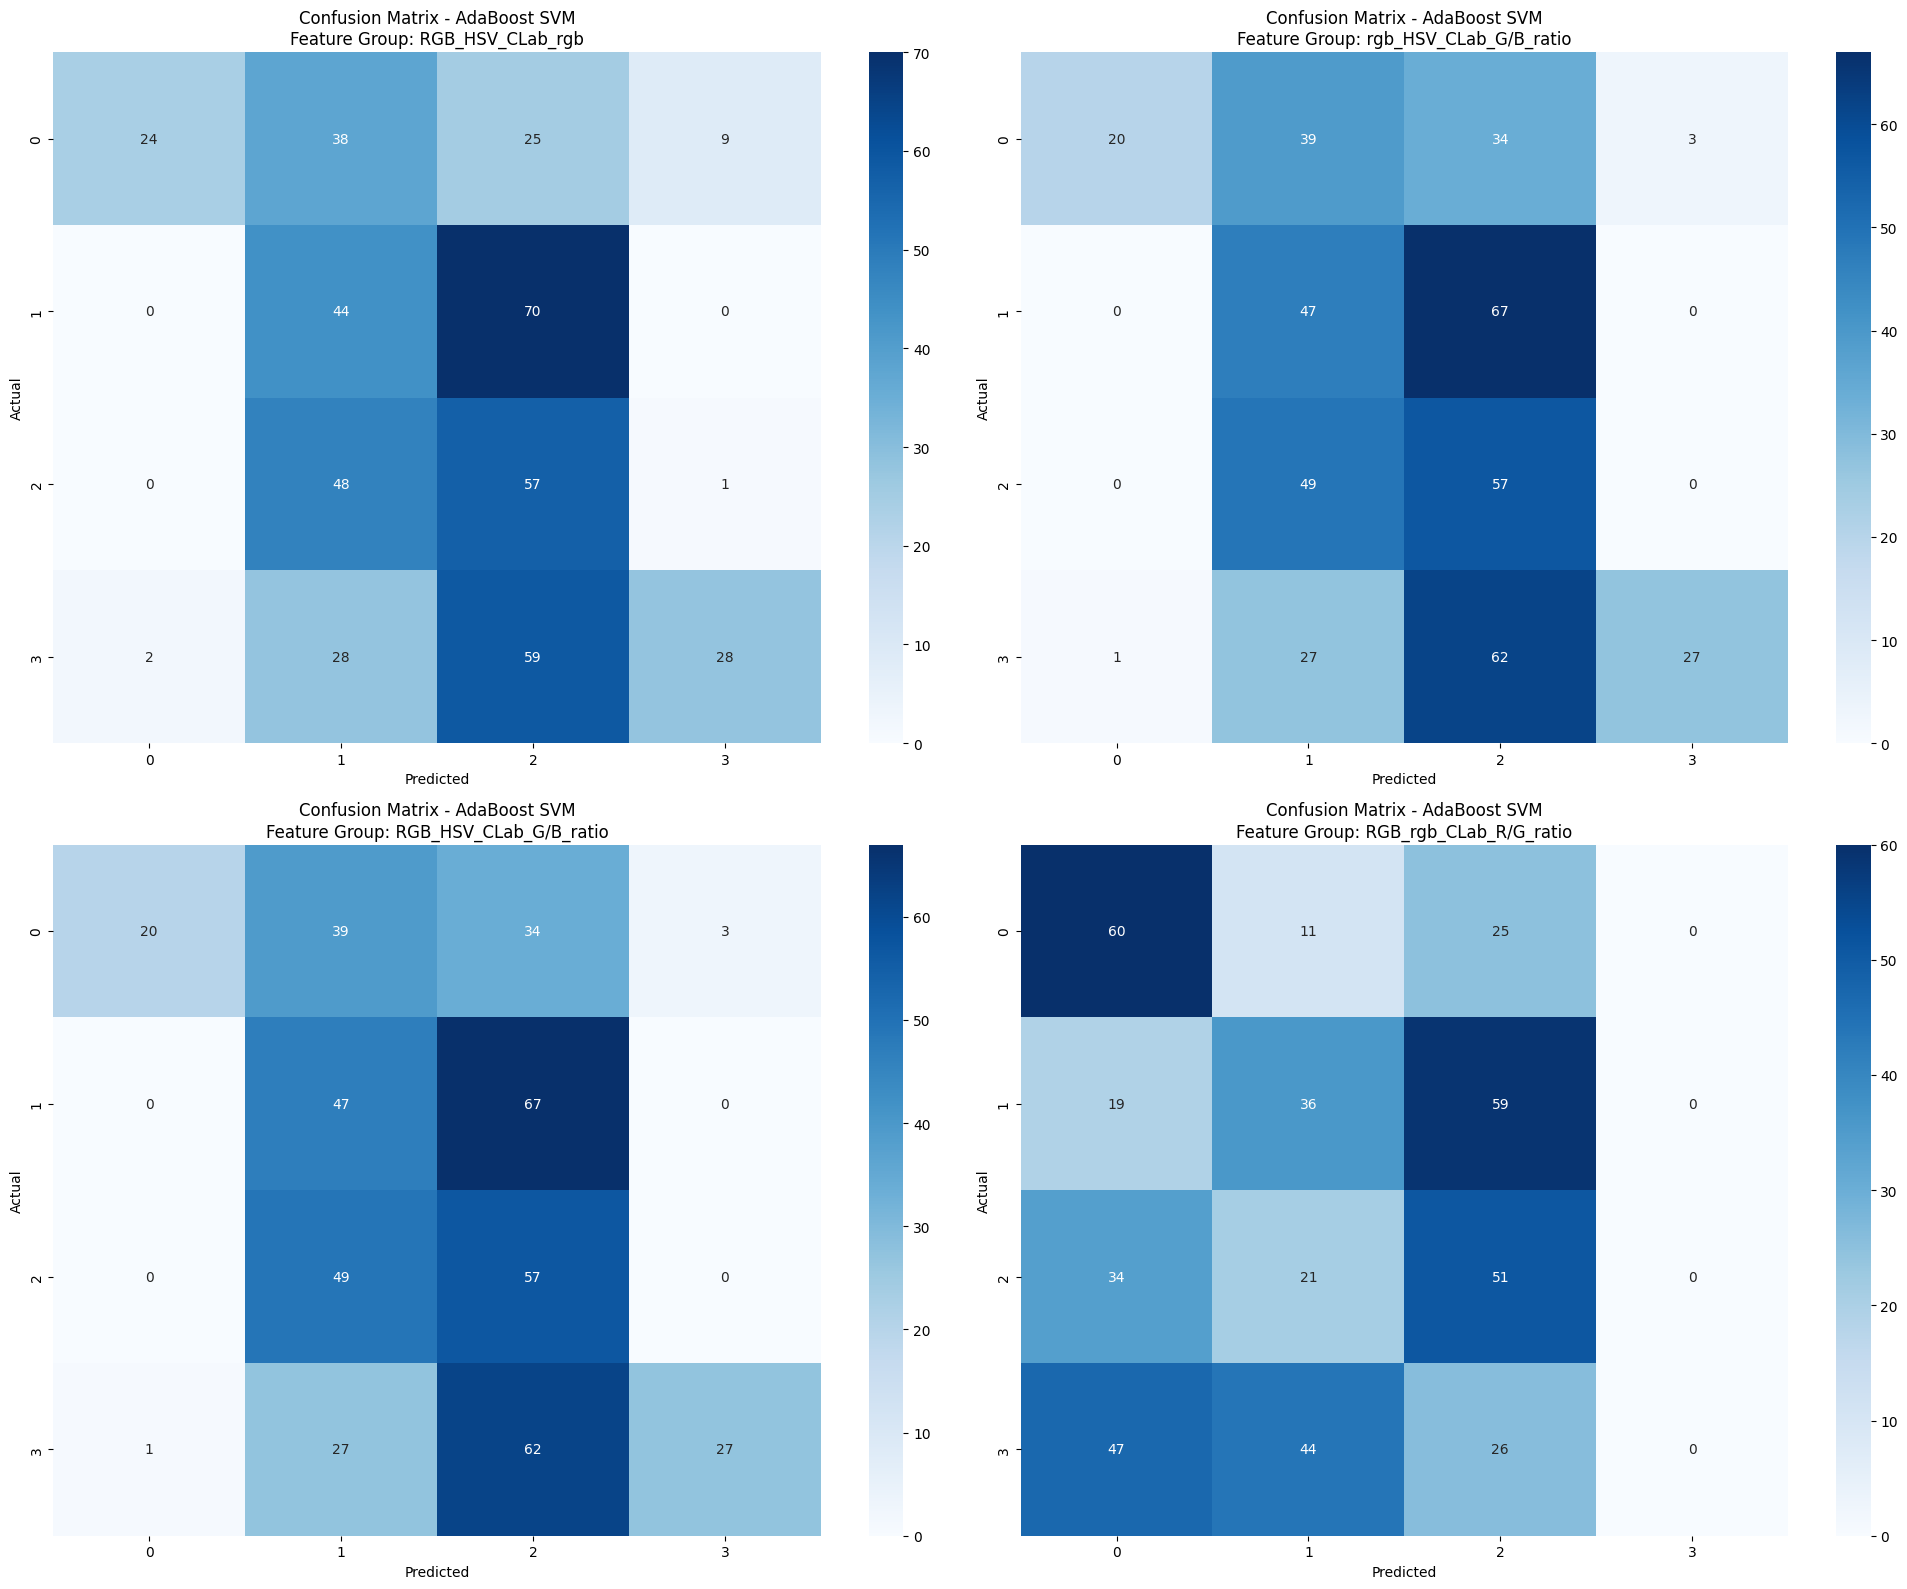

In [44]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=result_aboost_svm,
    metrics_df=metrics_df_adaboost_svm,
    model_name='AdaBoost SVM',
)

### **Confusion Matrix Bagging SVM Kernel RBF**

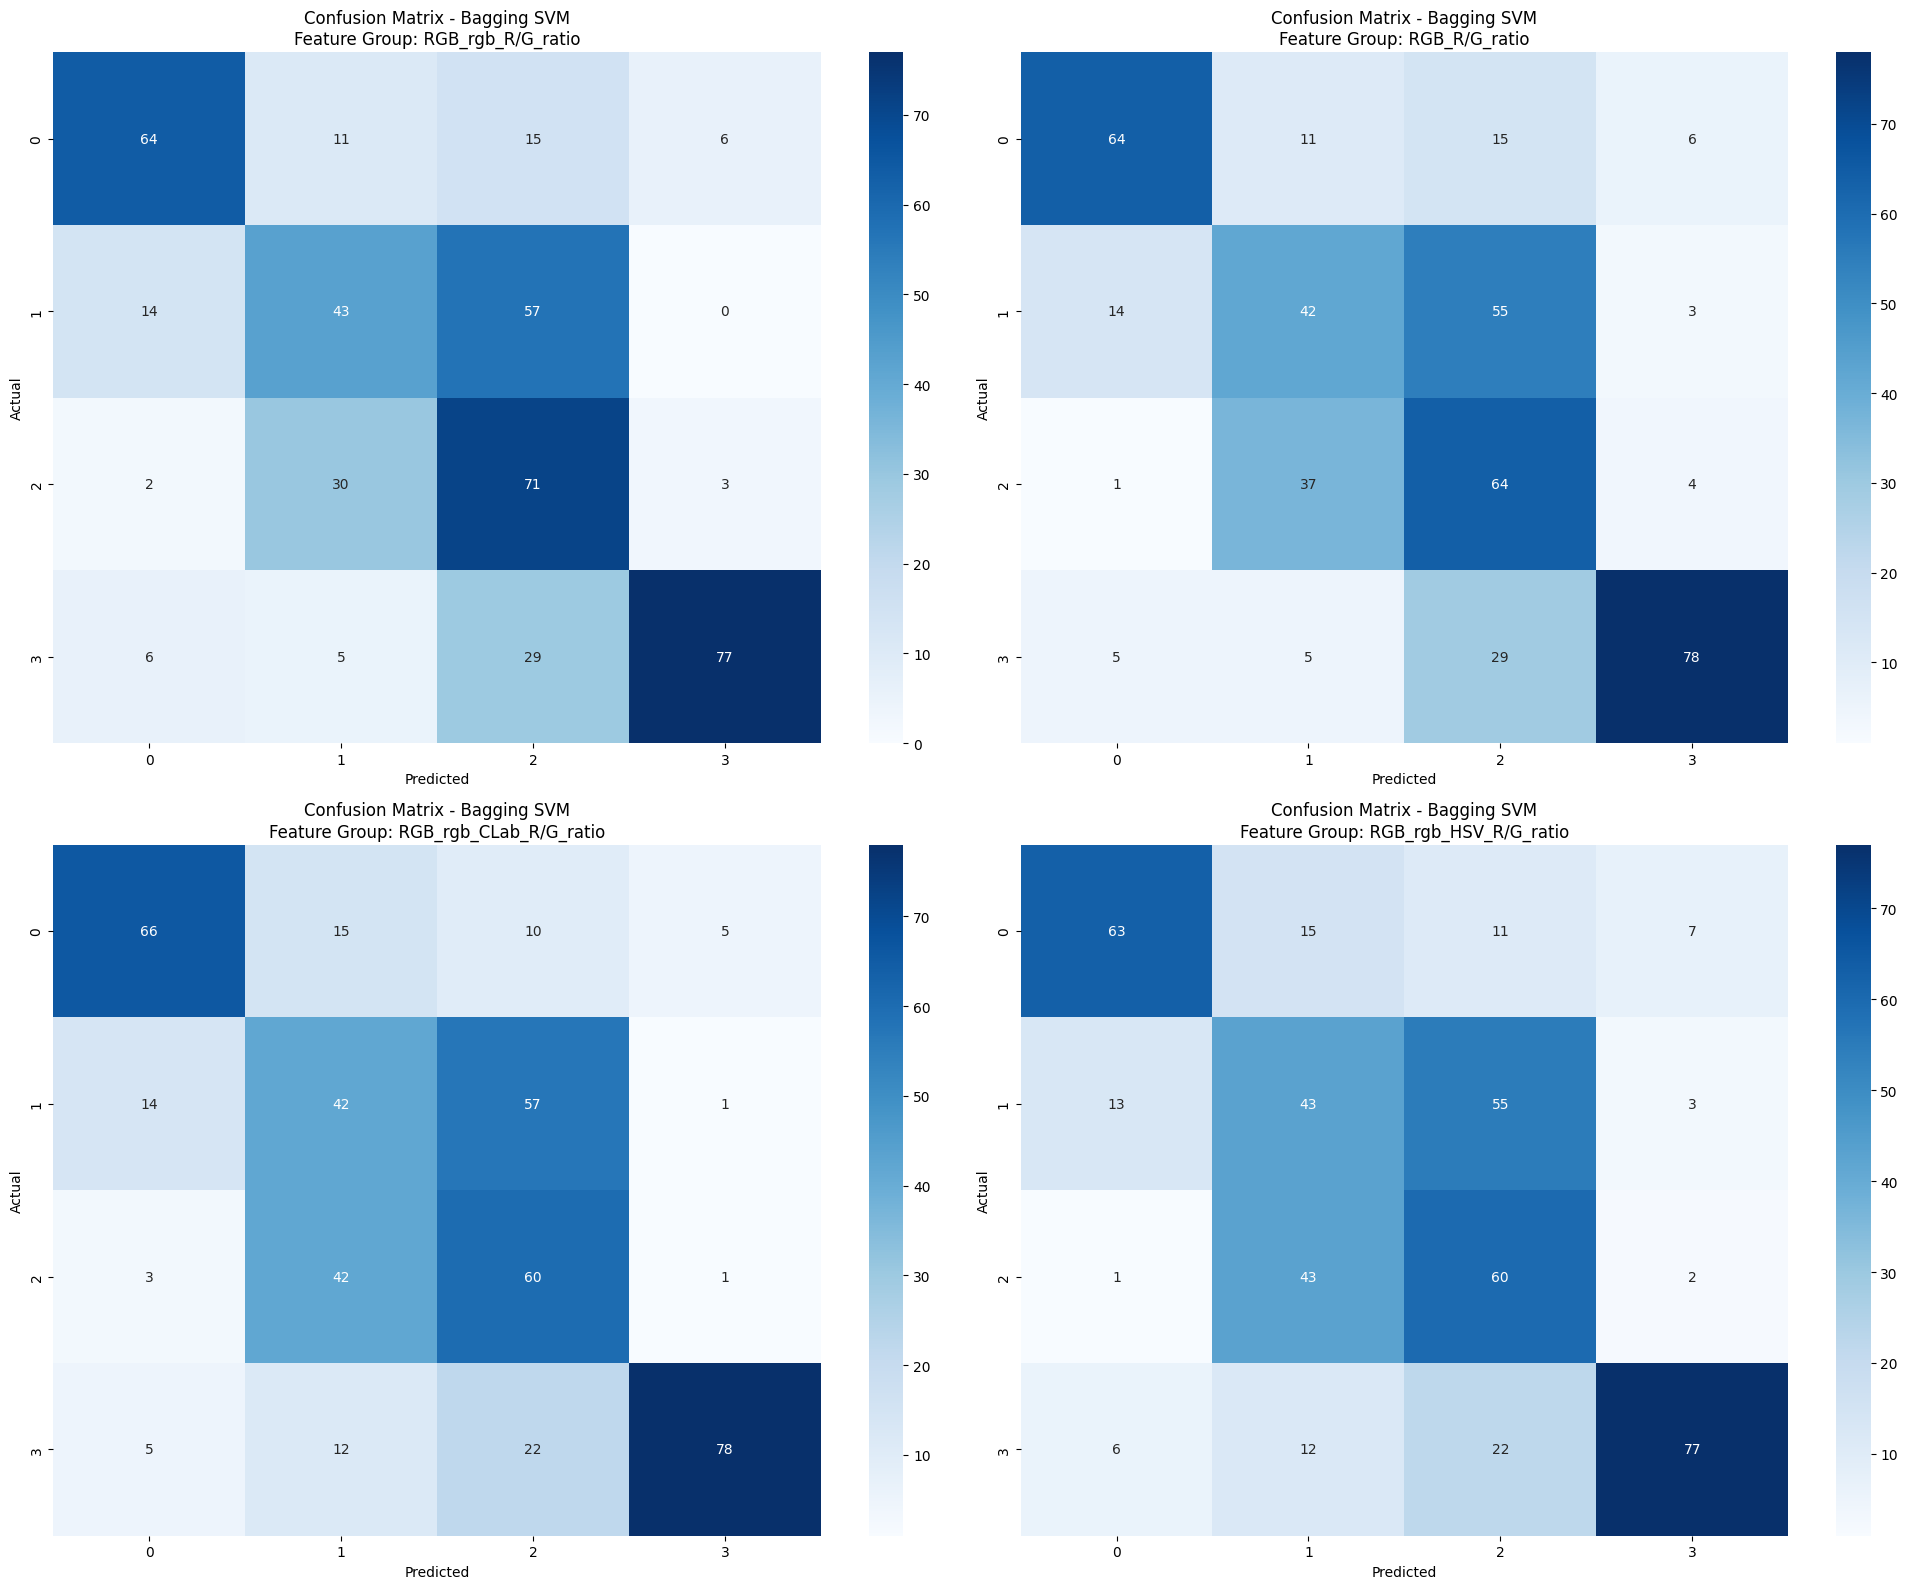

In [45]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=result_bagging_svm,
    metrics_df=metrics_df_bagging_svm,
    model_name='Bagging SVM',
)

## **ROC-AUC**

In [46]:
def plot_roc_per_model(model_probs, feature_groups, model_name, metrics_df, top_n=4):
    # Filter 6 grup fitur terbaik untuk model tertentu berdasarkan akurasi
    top_groups_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Accuracy')
    top_groups = top_groups_df['Feature Group'].tolist()

    # Inisialisasi list untuk menampung hasil plot
    default_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    # Binerisasi label uji berdasarkan grup fitur
    n_classes = len(np.unique(feature_groups[next(iter(feature_groups))]['y_test']))  # Tentukan jumlah kelas dari grup pertama
    classes = np.unique(feature_groups[next(iter(feature_groups))]['y_test'])
    y_test_bin = label_binarize(feature_groups[next(iter(feature_groups))]['y_test'], classes=classes)

    # Buat figure untuk menampilkan plot ROC dengan 2 baris dan 3 kolom
    fig, axes = plt.subplots(2, 2, figsize=(20, 18))
    axes = axes.flatten()  # Flatten agar mudah diiterasi

    # Iterasi untuk setiap kelas
    for i, class_idx in enumerate(range(n_classes)):
        ax = axes[i]  # Ambil subplot yang sesuai untuk kelas saat ini
        # Iterasi untuk setiap grup fitur (dataset)
        for j, group_name in enumerate(top_groups):
            y_prob = model_probs[group_name]
            y_test = feature_groups[group_name]['y_test']  # Ambil y_test berdasarkan grup fitur

            fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_prob[:, class_idx])
            roc_auc = auc(fpr, tpr)

            # Plot kurva ROC untuk grup fitur saat ini
            ax.plot(fpr, tpr, label=f'{group_name} (AUC = {roc_auc:.2f})', color=default_colors[j % len(default_colors)])

        # Detail plot
        ax.set_title(f'Class {class_idx}')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
        ax.grid()

    plt.tight_layout()
    plt.show()

### **ROC-AUC ANN**

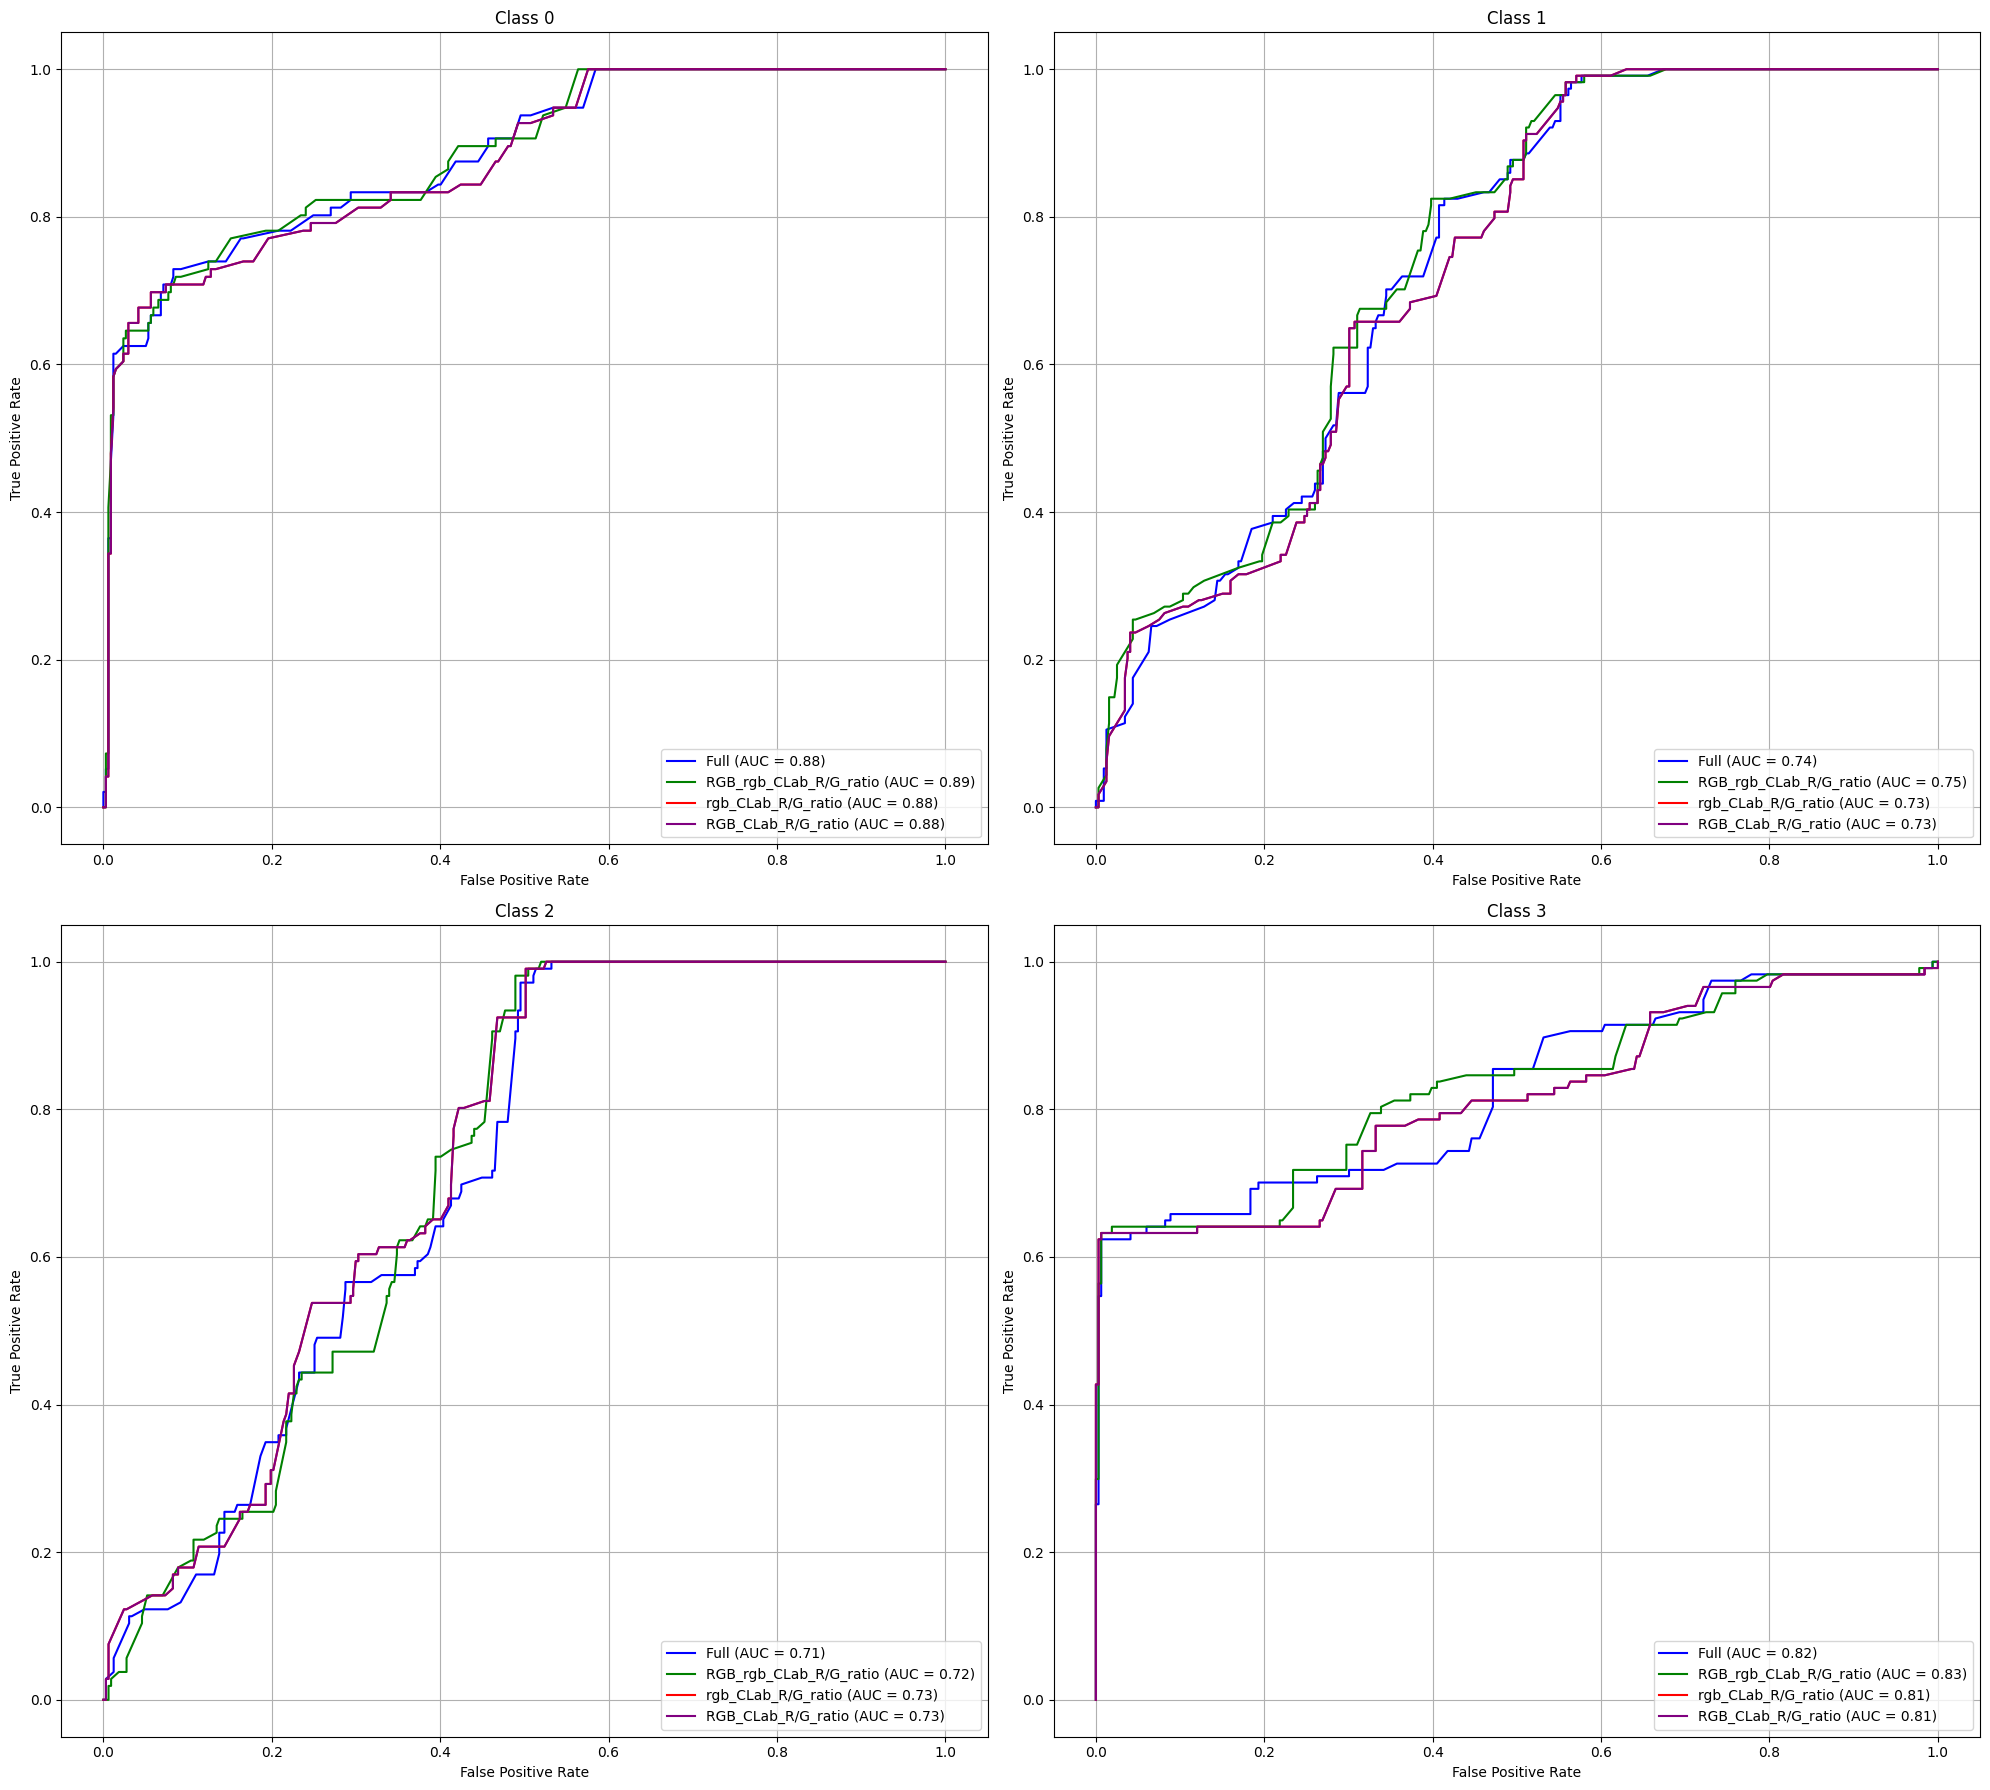

In [47]:
model_probs_ann = {group_name: results_ann[group_name]['y_prob'] for group_name in results_ann}
plot_roc_per_model(
    model_probs=model_probs_ann,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='ANN',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_ann,  # DataFrame yang berisi metrik evaluasi model
)


### **ROC-AUC Adaboost Decision Tree**

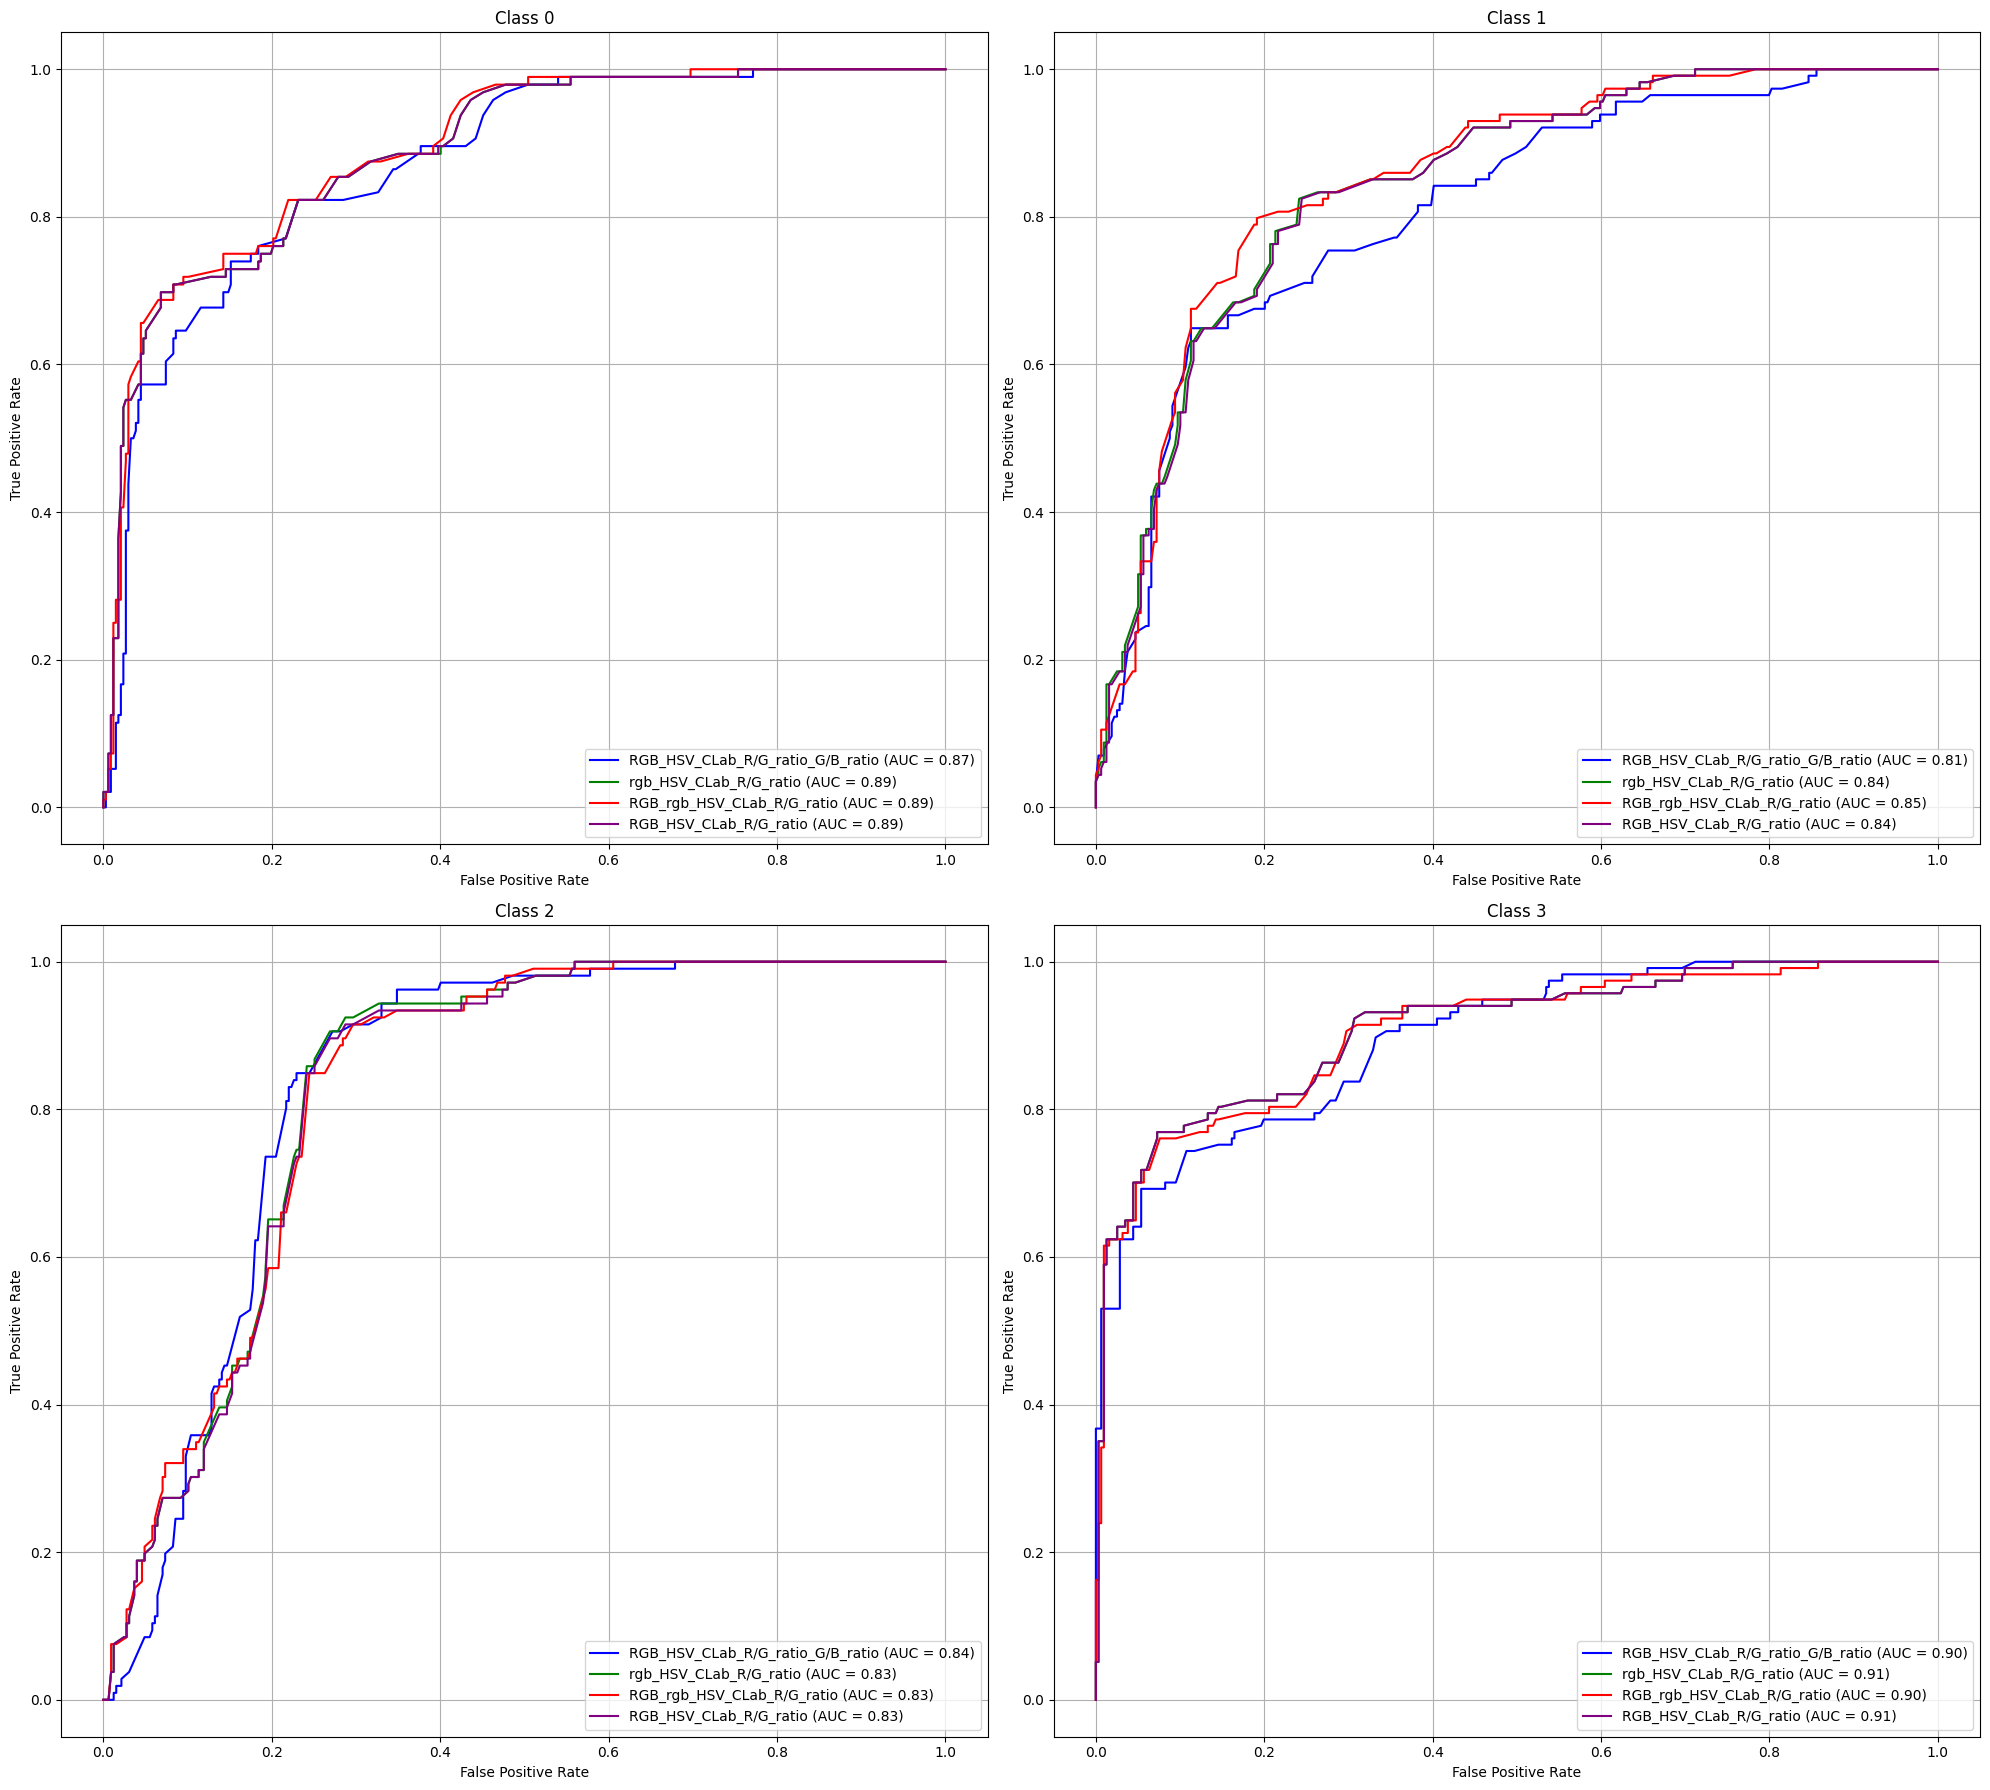

In [48]:
model_probs_adaboost_dt = {group_name: result_adaboost_dt[group_name]['y_prob'] for group_name in result_adaboost_dt}
plot_roc_per_model(
    model_probs=model_probs_adaboost_dt,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='AdaBoost DT',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_adaboost_dt,  # DataFrame yang berisi metrik evaluasi model
)

### **ROC-AUC Adaboost SVM Kernel RBF**

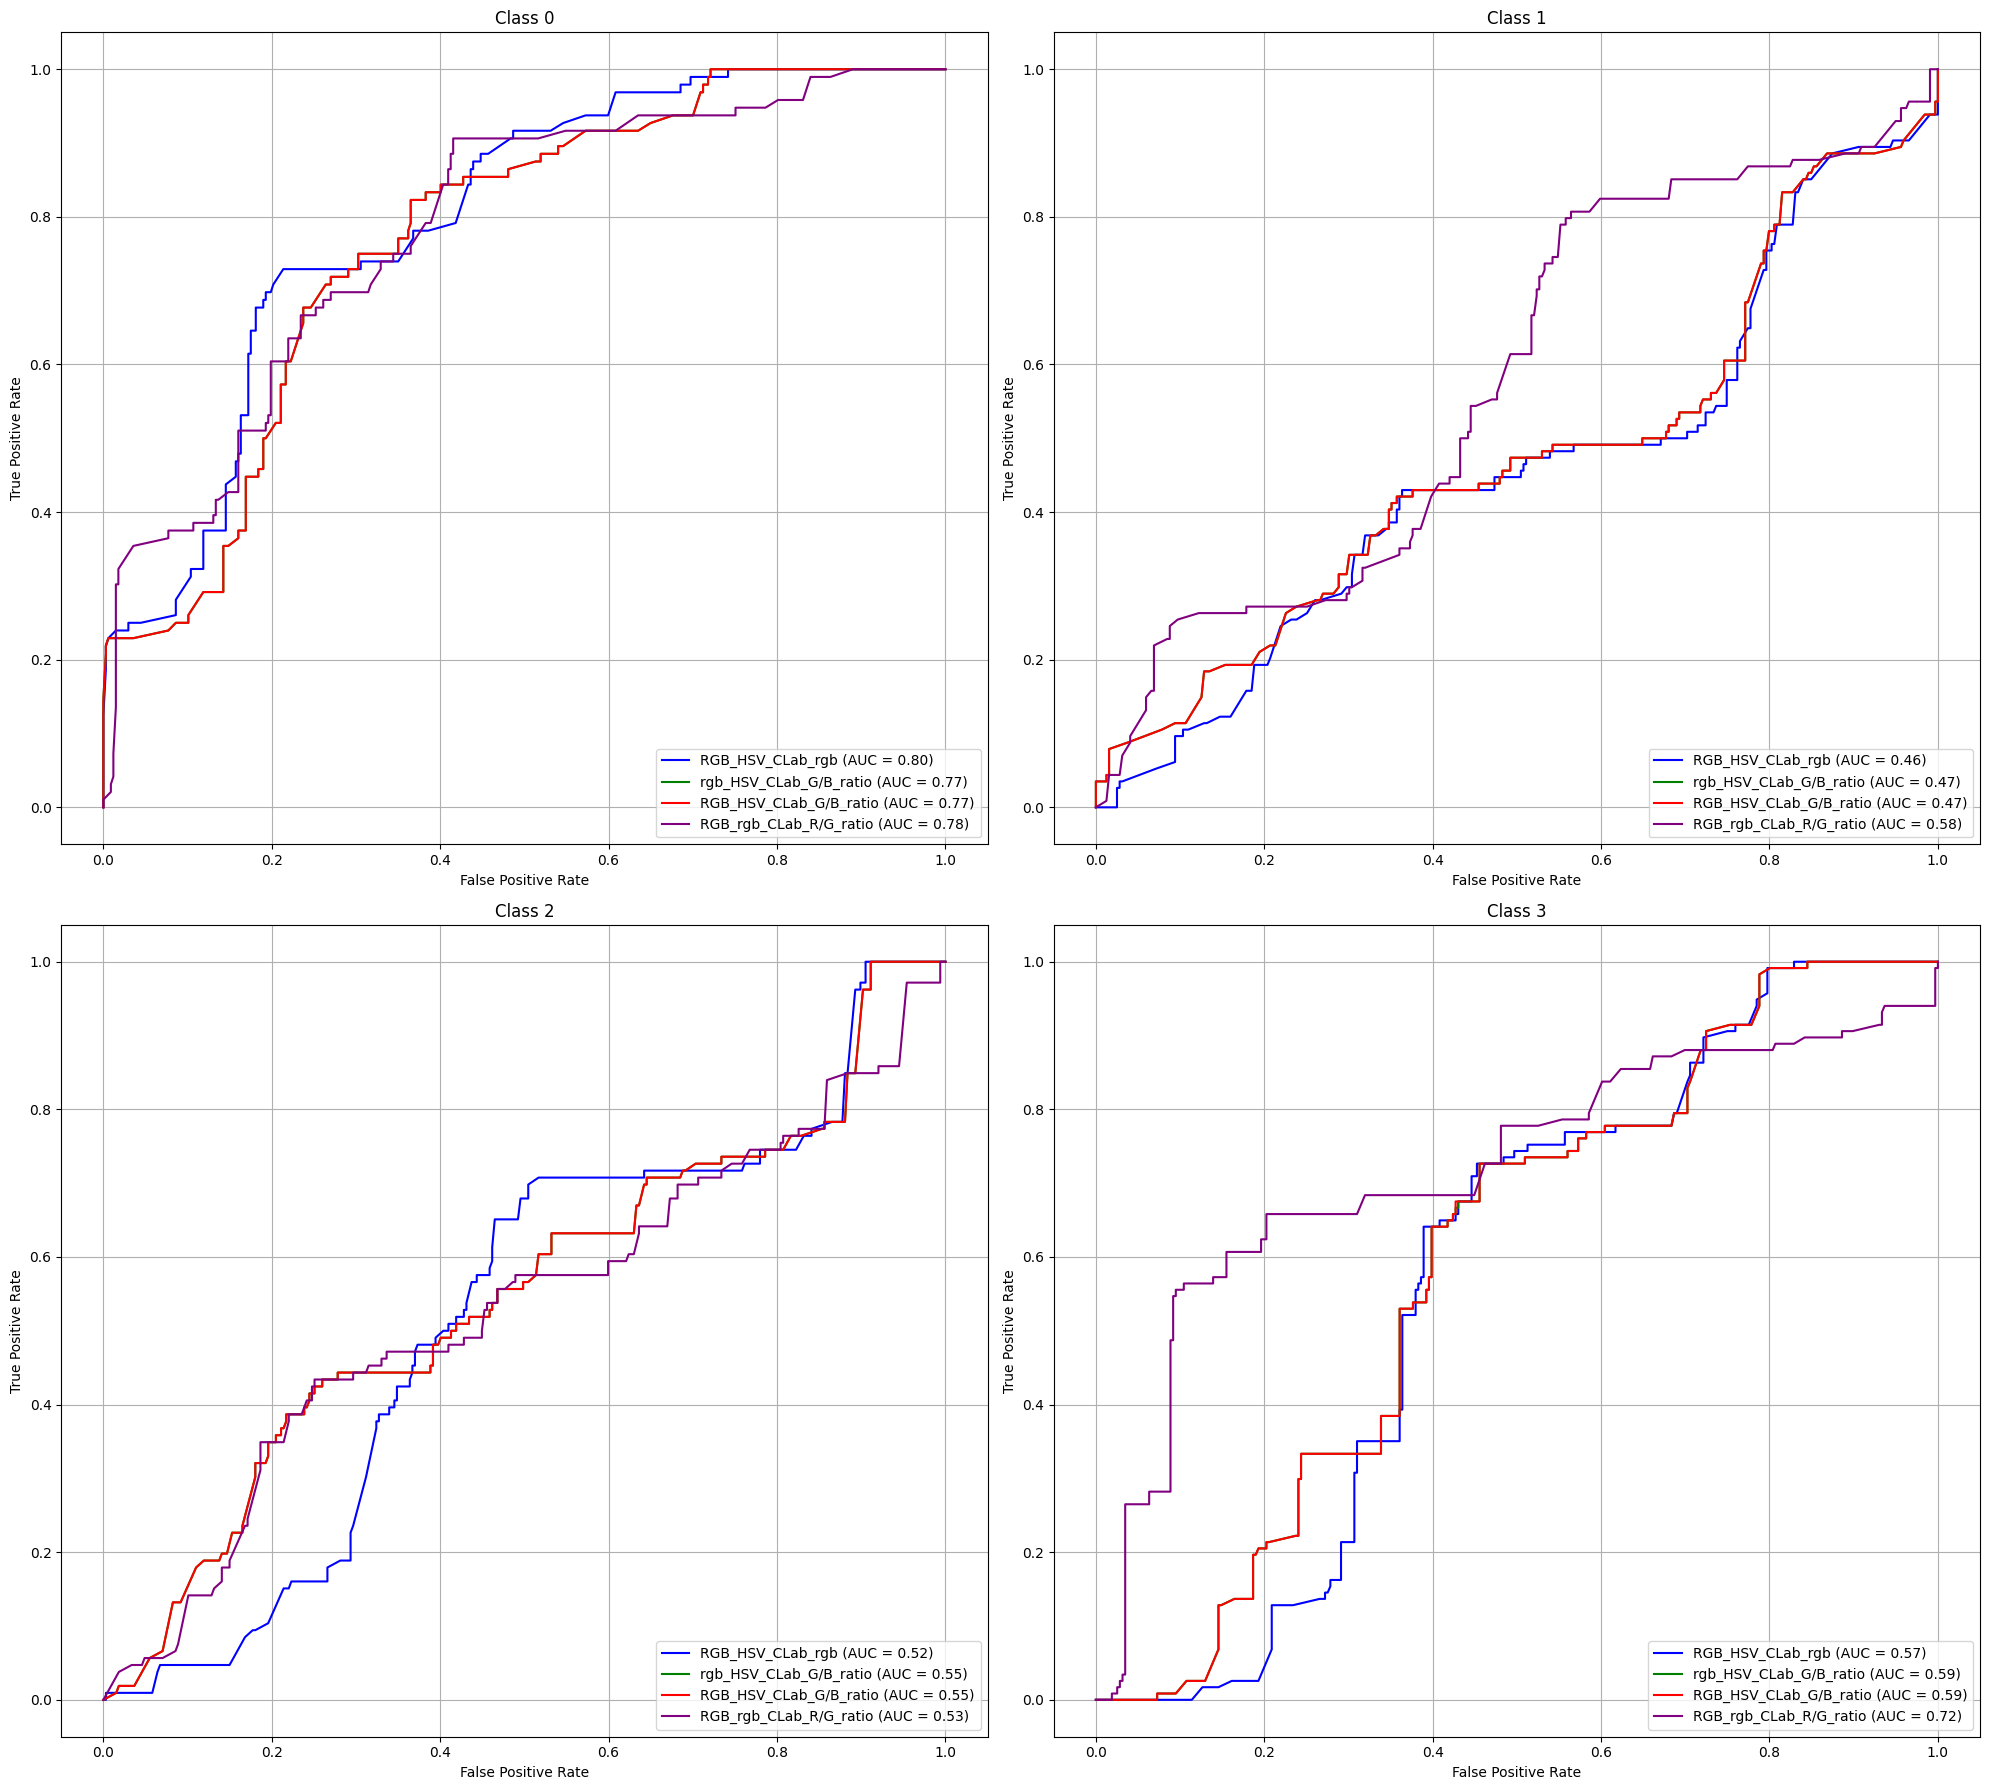

In [49]:
model_probs_adaboost_svm = {group_name: result_aboost_svm[group_name]['y_prob'] for group_name in result_aboost_svm}
plot_roc_per_model(
    model_probs=model_probs_adaboost_svm,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='AdaBoost SVM',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_adaboost_svm,  # DataFrame yang berisi metrik evaluasi model
)

### **ROC-AUC Bagging SVM Kernel RBF**

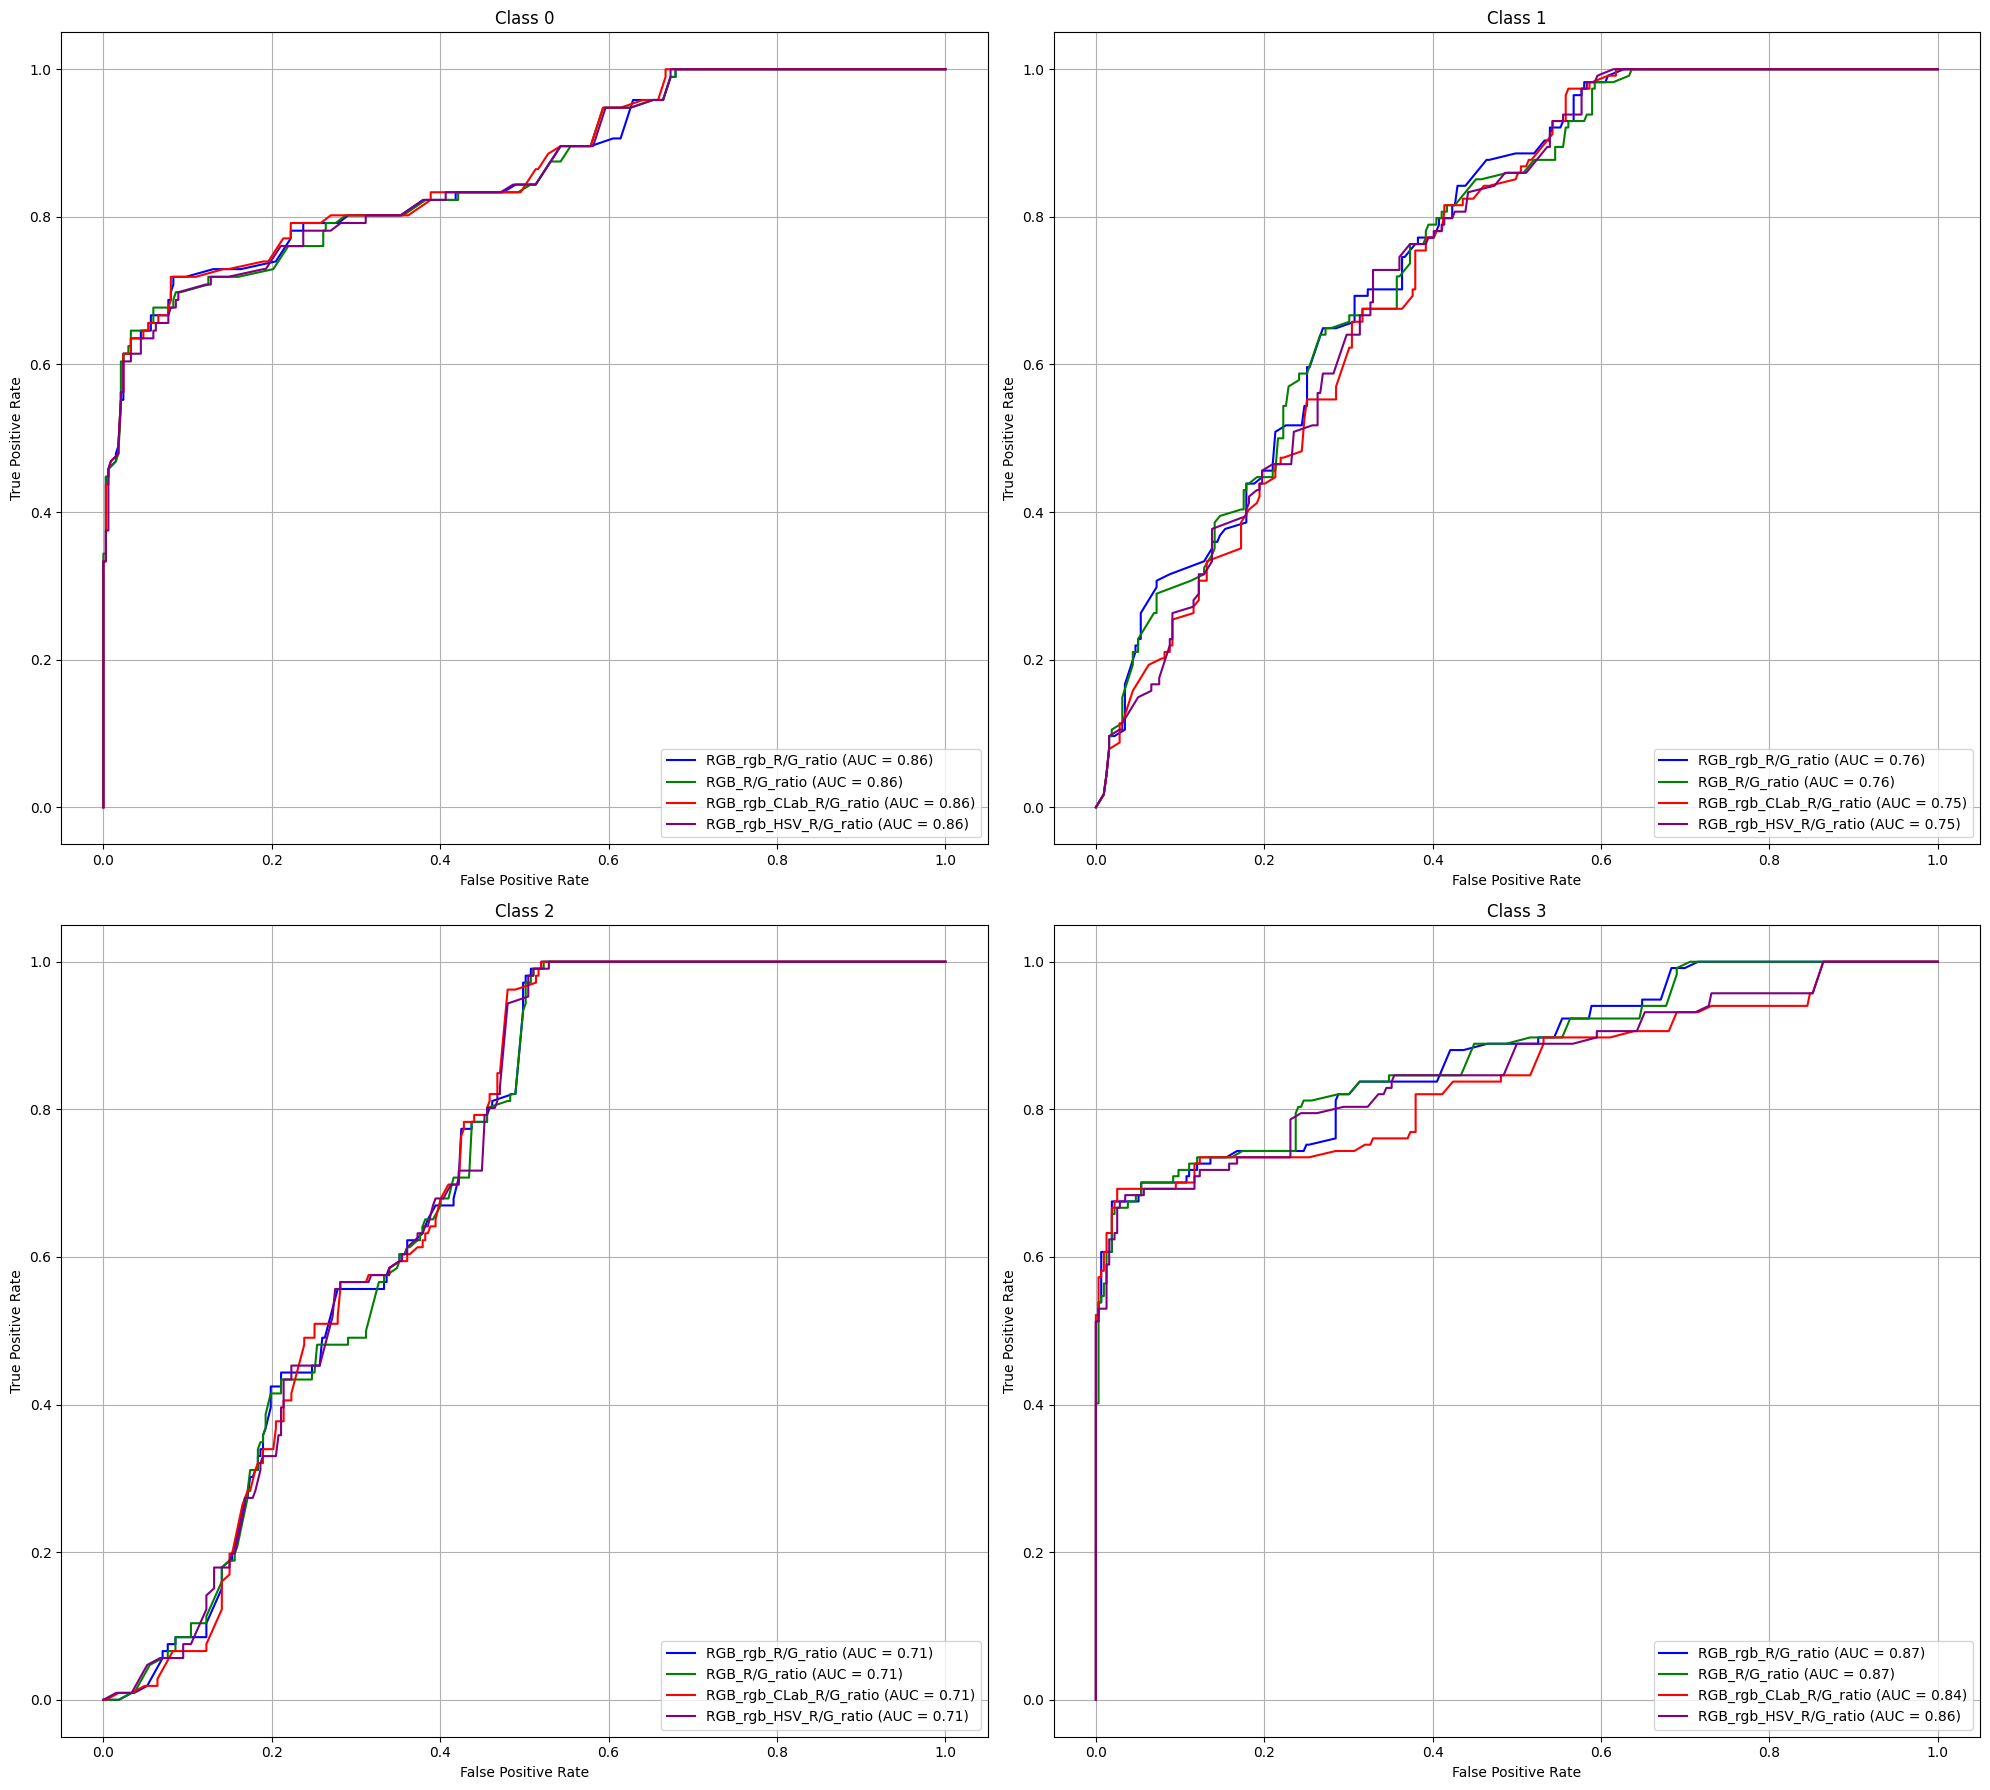

In [50]:
model_probs_bagging_svm = {group_name: result_bagging_svm[group_name]['y_prob'] for group_name in result_bagging_svm}
plot_roc_per_model(
    model_probs=model_probs_bagging_svm,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='Bagging SVM',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_bagging_svm,  # DataFrame yang berisi metrik evaluasi model
)

## **Perbandingan Metrik**

In [51]:
def visualize_model_feature_metrics(metrics_dict, model_names, top_n=4):
    # Setup grid layout untuk subplot
    n_models = len(model_names)
    fig, axes = plt.subplots(n_models, top_n, figsize=(20, n_models * 4))
    axes = axes if n_models > 1 else [axes]  # Pastikan axes selalu berupa array

    # Loop setiap model
    for model_idx, model_name in enumerate(model_names):
        # Ambil metrics_df spesifik untuk model
        metrics_df = metrics_dict.get(model_name)
        if metrics_df is None:
            raise ValueError(f"Metrics DataFrame untuk model '{model_name}' tidak ditemukan.")

        # Filter kombinasi fitur terbaik untuk model
        top_features_df = metrics_df.nlargest(top_n, 'Accuracy')
        top_feature_groups = top_features_df['Feature Group'].tolist()

        # Loop setiap kombinasi fitur
        for feature_idx, feature_group in enumerate(top_feature_groups):
            ax = axes[model_idx][feature_idx] if n_models > 1 else axes[feature_idx]

            # Ambil metrik untuk kombinasi fitur ini
            metrics = top_features_df[top_features_df['Feature Group'] == feature_group].iloc[0]
            values = [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-Score']]
            labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

            # Plot barchart
            bars = sns.barplot(x=labels, y=values, ax=ax, palette='tab10', hue=labels)
            ax.set_title(f"{model_name} - {feature_group}")
            ax.set_ylim(0, 1)
            ax.set_ylabel('Score')
            ax.set_xlabel('Metrics')
            ax.grid(axis='y')

            # Tambahkan nilai persentase di atas bar
            for bar, value in zip(bars.patches, values):
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    f"{value:.2%}",
                    ha='center',
                    va='bottom',
                    fontsize=10
                )
    
    # Atur tata letak
    plt.tight_layout()
    plt.show()

In [52]:
metrics_dict = {
    'ANN': metrics_df_ann,
    'AdaBoost DT': metrics_df_adaboost_dt,
    'AdaBoost SVM': metrics_df_adaboost_svm,
    'Bagging SVM': metrics_df_bagging_svm
}

model_names = ['ANN', 'AdaBoost DT', 'AdaBoost SVM', 'Bagging SVM']

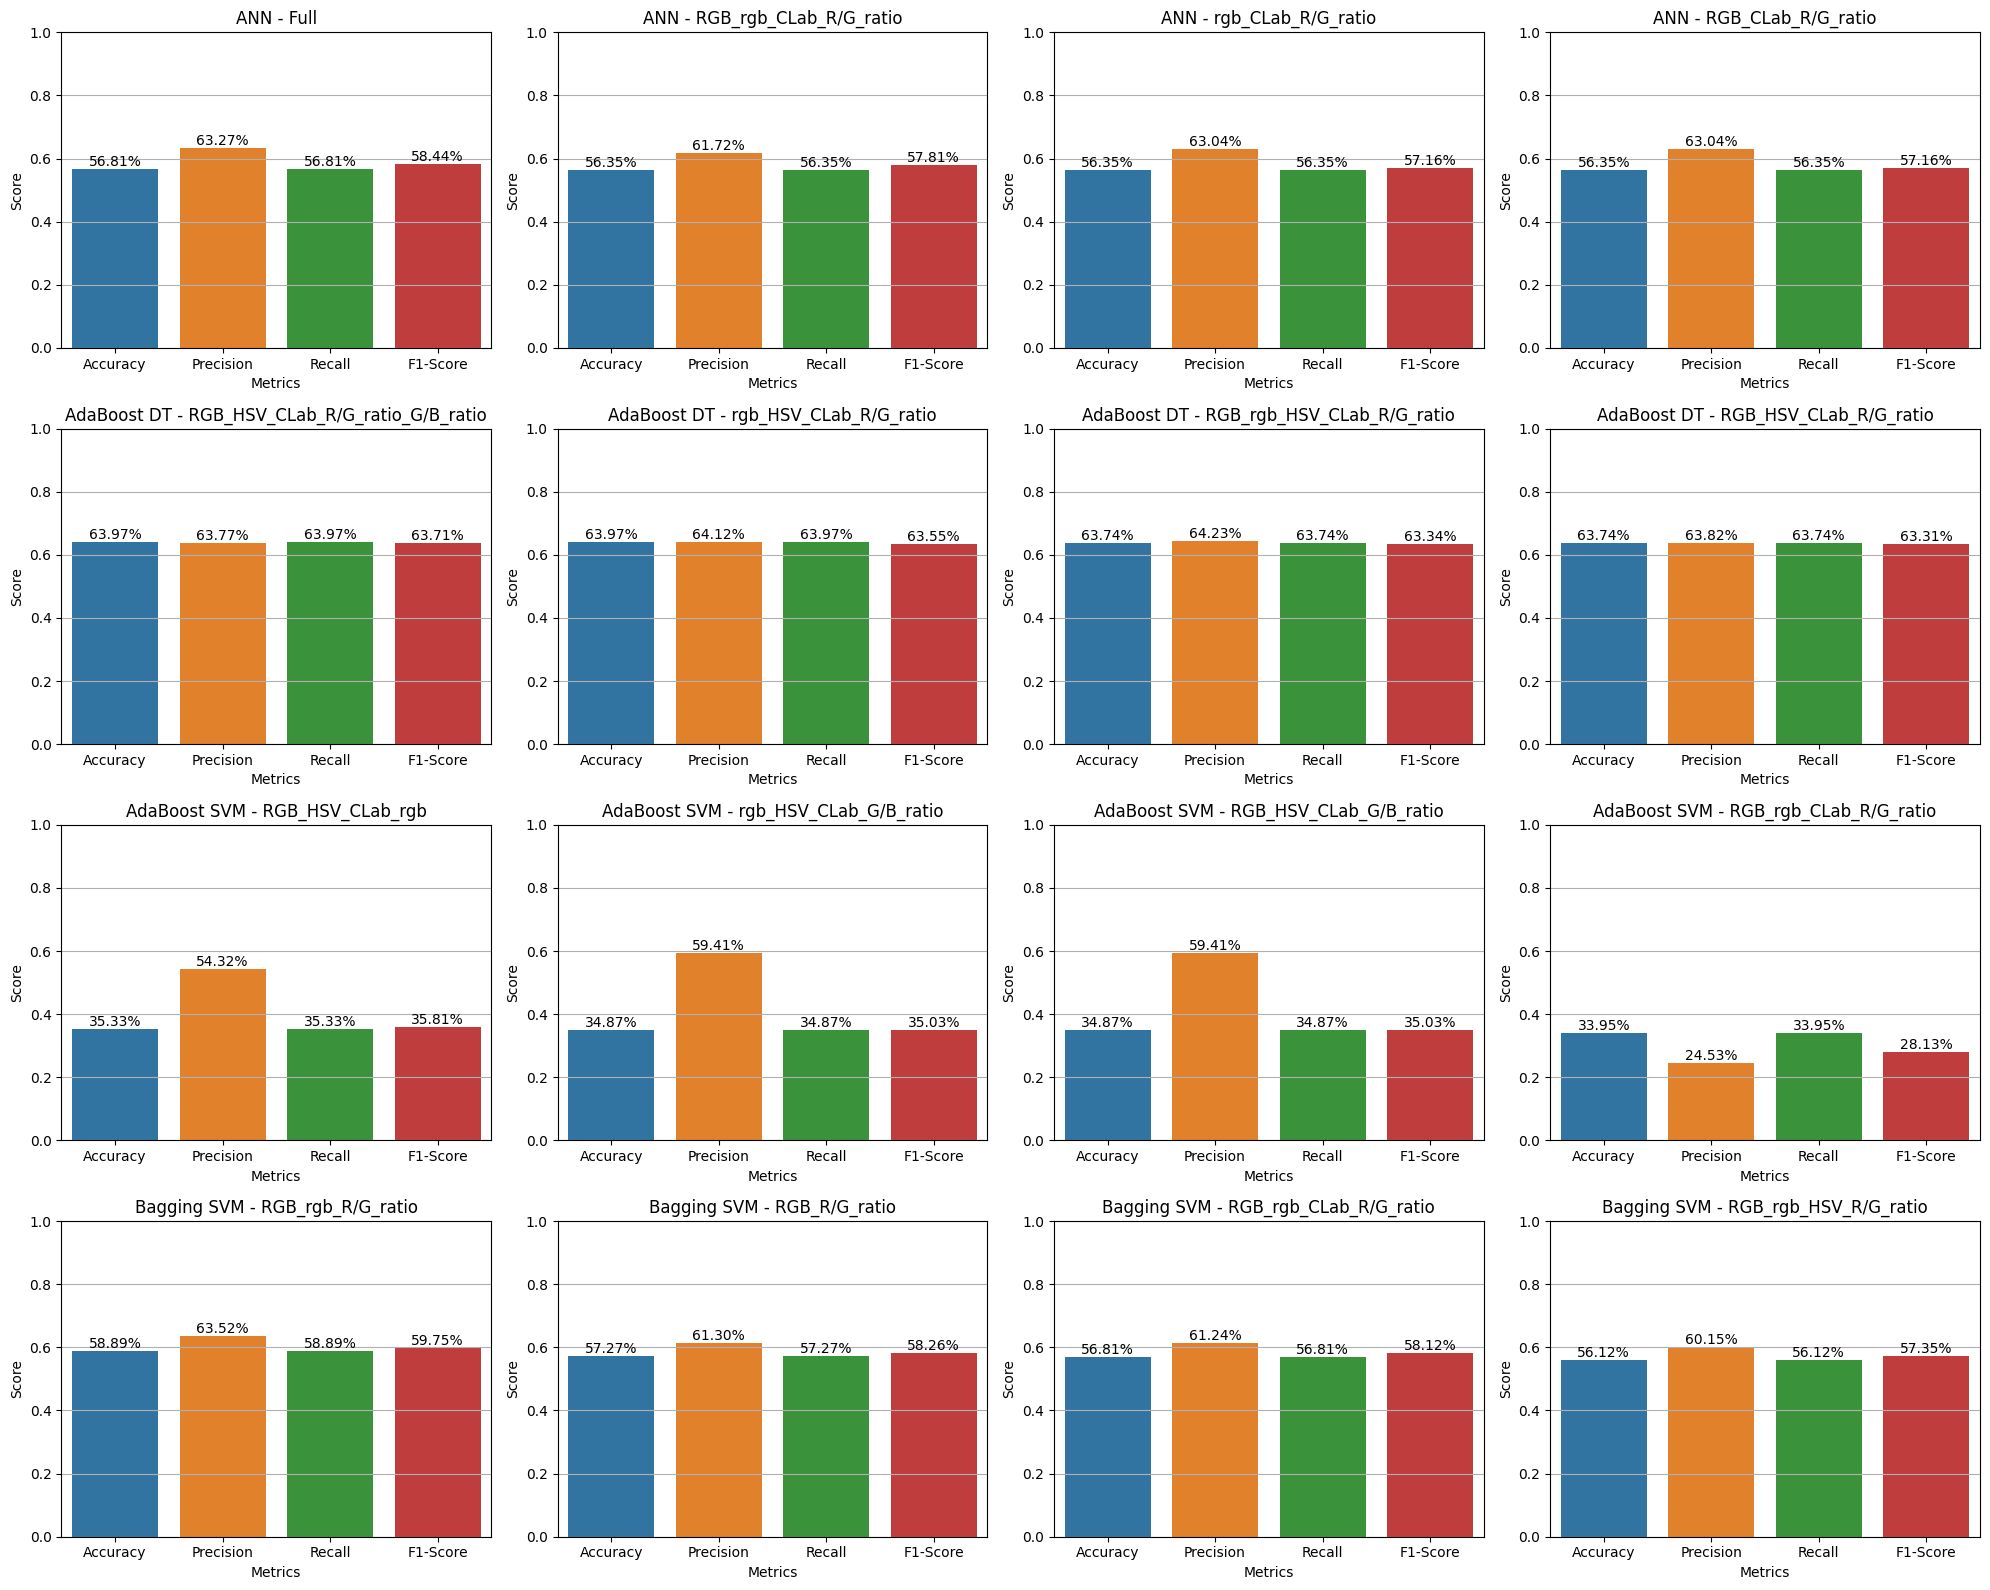

In [53]:
visualize_model_feature_metrics(
    metrics_dict=metrics_dict,
    model_names=model_names,
)

# **Fine Tuning**

## **Import Library**

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

## **Training dan Evaluasi Model**

In [ ]:
def evaluate_tuned_model(top_feature_data, model_func, tuned_params, model_name, cv=3):
    results = {}
    metrics_data_cv = []
    metrics_data_final = []
    
    # Mapping untuk preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
        'SVM': 'X_train_svm',
        'Decision Tree': 'X_train_dt',
    }
    
    # Validasi model
    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    
    X_train_key = model_preprocessing_map[model_name]
    
    for group_name, data in top_feature_data.items():
        print(f"\n=== Evaluating {model_name} for {group_name} ===")
        
        if X_train_key not in data:
            raise ValueError(f"Data '{X_train_key}' tidak tersedia untuk grup fitur '{group_name}'")
        
        X_train = data[X_train_key]
        y_train = data['y_train']

        # Parameter hasil tuning
        params = tuned_params[group_name]['params']
        
        # Convert to numpy arrays if they are pandas DataFrames
        if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
            X_train = X_train.values
        if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
            y_train = y_train.values
        
        # Inisialisasi StratifiedKFold
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        
        # List untuk menyimpan skor dari setiap fold
        acc_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        
        # List untuk menyimpan laporan klasifikasi dari setiap fold
        fold_reports = []
        
        # Lakukan cross-validation manual
        fold_count = 1
        for train_idx, val_idx in skf.split(X_train, y_train):
            # Split data untuk fold ini - handle both numpy arrays and pandas objects
            X_fold_train = X_train[train_idx] if isinstance(X_train, np.ndarray) else X_train.iloc[train_idx]
            X_fold_val = X_train[val_idx] if isinstance(X_train, np.ndarray) else X_train.iloc[val_idx]
            y_fold_train = y_train[train_idx] if isinstance(y_train, np.ndarray) else y_train.iloc[train_idx]
            y_fold_val = y_train[val_idx] if isinstance(y_train, np.ndarray) else y_train.iloc[val_idx]
            
            # Latih model dengan data fold ini
            print(f"\n--- Fold {fold_count} ---")
            model = model_func(X_fold_train, y_fold_train, X_fold_train, y_fold_train, params=params, show_report=False)[0]
            
            # Prediksi pada data validasi
            y_pred = model.predict(X_fold_val)
            
            # Hitung metrik
            report = classification_report(y_fold_val, y_pred, digits=4, output_dict=True)
            fold_reports.append(report)
            
            # Tampilkan laporan klasifikasi untuk fold ini
            print(f"Classification Report Fold {fold_count}:")
            print(classification_report(y_fold_val, y_pred, digits=4))
            
            # Tambahkan skor ke daftar
            acc_scores.append(accuracy_score(y_fold_val, y_pred))
            precision_scores.append(precision_score(y_fold_val, y_pred, average='weighted'))
            recall_scores.append(recall_score(y_fold_val, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_fold_val, y_pred, average='weighted'))
            
            fold_count += 1

        # Tampilkan rata-rata skor dari semua fold
        print(f"\n--- Average Metrics Across {cv} Folds ---")
        print(f"Accuracy: {np.mean(acc_scores):.6f}")
        print(f"Precision: {np.mean(precision_scores):.6f}")
        print(f"Recall: {np.mean(recall_scores):.6f}")
        print(f"F1-Score: {np.mean(f1_scores):.6f}")
        
        # Latih model final dengan semua data training
        final_model = model_func(X_train, y_train, X_train, y_train, params=params, show_report=False)[0]
        
        # Prediksi pada data training untuk classification report model final
        y_final_pred = final_model.predict(X_train)
        y_final_prob = final_model.predict_proba(X_train)  # Probabilitas prediksi
        
        # Hitung classification report model final
        final_report = classification_report(y_train, y_final_pred, digits=4, output_dict=True)
        
        # Ekstrak metrik dari classification report model final
        final_accuracy = final_report['accuracy']
        final_precision = final_report['weighted avg']['precision']
        final_recall = final_report['weighted avg']['recall']
        final_f1_score = final_report['weighted avg']['f1-score']
        
        # Tampilkan classification report model final
        print("\n--- Classification Report Model Final ---")
        print(classification_report(y_train, y_final_pred, digits=4))
        
        # Simpan hasil evaluasi model
        results[group_name] = {
            'model': final_model,
            'cv_scores': {
                'accuracy': np.mean(acc_scores),
                'precision': np.mean(precision_scores),
                'recall': np.mean(recall_scores),
                'f1': np.mean(f1_scores)
            },
            'final_metrics': {
                'accuracy': final_accuracy,
                'precision': final_precision,
                'recall': final_recall,
                'f1_score': final_f1_score
            },
            'y_pred': y_final_pred,  # Prediksi kelas model final
            'y_prob': y_final_prob   # Probabilitas prediksi model final
        }
        
        # Tambahkan metrik final ke metrics_data untuk DataFrame
        metrics_data_cv.append({
            'Feature Group': group_name,
            'Model': model_name,
            'CV Accuracy': np.mean(acc_scores),  # Rata-rata CV
            'CV Precision': np.mean(precision_scores),
            'CV Recall': np.mean(recall_scores),
            'CV F1-Score': np.mean(f1_scores),
        })
        
        metrics_data_final.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Final Accuracy': final_accuracy,  # Akurasi model final
            'Final Precision': final_precision,
            'Final Recall': final_recall,
            'Final F1-Score': final_f1_score
        })

    # Konversi hasil evaluasi ke DataFrame
    metrics_df_cv = pd.DataFrame(metrics_data_cv)
    metrics_df_final = pd.DataFrame(metrics_data_final)
    return results, metrics_df_cv, metrics_df_final

### **Artiﬁcial Neural Network (ANN)**

In [56]:
top_features_ann = metrics_df_ann.nlargest(4, 'Accuracy')

top_feature_groups_ann = top_features_ann['Feature Group'].tolist()

# Filter feature_groups untuk hanya menyimpan data dari kombinasi terbaik
top_feature_data = {group: data_prep[group] for group in top_feature_groups_ann}

In [57]:
def fine_tune_ann_for_top_features(top_feature_data):
    tuned_params = {}

    for group_name, data in top_feature_data.items():
        print(f"\n=== Fine-Tuning ANN untuk Kombinasi Fitur: {group_name} ===")
        X_train = data['X_train_ann']
        y_train = data['y_train']

        param_grid = {
            'hidden_layer_sizes': [(100,), (128, 64), (128, 64, 32)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
        }

        ann = MLPClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=ann, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        tuned_params[group_name] = {
            'params': grid_search.best_params_,
            'score': grid_search.best_score_,
        }

        print(f"Best Parameters for {group_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params


In [58]:
tuned_params_ann = fine_tune_ann_for_top_features(top_feature_data)


=== Fine-Tuning ANN untuk Kombinasi Fitur: Full ===
Best Parameters for Full: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}
Best Score: 0.6032

=== Fine-Tuning ANN untuk Kombinasi Fitur: RGB_rgb_CLab_R/G_ratio ===
Best Parameters for RGB_rgb_CLab_R/G_ratio: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}
Best Score: 0.5992

=== Fine-Tuning ANN untuk Kombinasi Fitur: rgb_CLab_R/G_ratio ===
Best Parameters for rgb_CLab_R/G_ratio: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}
Best Score: 0.5873

=== Fine-Tuning ANN untuk Kombinasi Fitur: RGB_CLab_R/G_ratio ===
Best Parameters for RGB_CLab_R/G_ratio: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant'}
Best Score: 0.5873


In [59]:
results_ann_tuned, metrics_df_cv_ann_tuned, metrics_df_final_ann_tuned = evaluate_tuned_model(
    top_feature_data=top_feature_data,
    model_func=train_ann,
    tuned_params=tuned_params_ann,
    model_name='ANN',
    cv=3
)


=== Evaluating ANN for Full ===

--- Fold 1 ---
=== Melatih Model ANN ===
Classification Report Fold 1:
              precision    recall  f1-score   support

           0     0.8276    0.6316    0.7164        76
           1     0.6310    0.6235    0.6272        85
           2     0.5403    0.7053    0.6119        95
           3     0.8429    0.7375    0.7867        80

    accuracy                         0.6756       336
   macro avg     0.7104    0.6745    0.6855       336
weighted avg     0.7003    0.6756    0.6810       336


--- Fold 2 ---
=== Melatih Model ANN ===
Classification Report Fold 2:
              precision    recall  f1-score   support

           0     0.7500    0.5065    0.6047        77
           1     0.4639    0.5294    0.4945        85
           2     0.4911    0.5851    0.5340        94
           3     0.7600    0.7125    0.7355        80

    accuracy                         0.5833       336
   macro avg     0.6162    0.5834    0.5922       336
weighted

In [60]:
metrics_df_cv_ann_tuned

,Feature Group,Model,CV Accuracy,CV Precision,CV Recall,CV F1-Score
0,Full,ANN,0.629960,0.656046,0.629960,0.635516
1,RGB_rgb_CLab_R/G_ratio,ANN,0.647817,0.666919,0.647817,0.648479
2,rgb_CLab_R/G_ratio,ANN,0.657738,0.684350,0.657738,0.656155
3,RGB_CLab_R/G_ratio,ANN,0.662698,0.692384,0.662698,0.662646


In [61]:
metrics_df_final_ann_tuned

,Feature Group,Model,Final Accuracy,Final Precision,Final Recall,Final F1-Score
0,Full,ANN,0.622024,0.677263,0.622024,0.634742
1,RGB_rgb_CLab_R/G_ratio,ANN,0.578373,0.629985,0.578373,0.592870
2,rgb_CLab_R/G_ratio,ANN,0.623016,0.708910,0.623016,0.615507
3,RGB_CLab_R/G_ratio,ANN,0.623016,0.708910,0.623016,0.615507


### **Adaboost Decision Tree**

In [62]:
top_features_adaboost_dt = metrics_df_adaboost_dt.nlargest(4, 'Accuracy')
top_feature_groups_adaboost_dt = top_features_adaboost_dt['Feature Group'].tolist()
# Filter feature_groups untuk hanya menyimpan data dari kombinasi terbaik
top_feature_data_adaboost_dt = {group: data_prep[group] for group in top_feature_groups_adaboost_dt}

In [63]:
def fine_tune_adaboost_dt_for_top_features(top_feature_data):
    tuned_params = {}

    for group_name, data in top_feature_data.items():
        print(f"\n=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: {group_name} ===")
        X_train = data['X_train_dt']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 1.0, 2.0],
        }

        dt = DecisionTreeClassifier(max_depth=3, random_state=42)
        adaboost_dt = AdaBoostClassifier(estimator=dt, random_state=42)
        grid_search = GridSearchCV(estimator=adaboost_dt, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        tuned_params[group_name] = {
            'params': grid_search.best_params_,
            'score': grid_search.best_score_,
        }

        print(f"Best Parameters for {group_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params

In [64]:
tuned_params_adaboost_dt = fine_tune_adaboost_dt_for_top_features(top_feature_data_adaboost_dt)


=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: RGB_HSV_CLab_R/G_ratio_G/B_ratio ===
Best Parameters for RGB_HSV_CLab_R/G_ratio_G/B_ratio: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.6845

=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: rgb_HSV_CLab_R/G_ratio ===
Best Parameters for rgb_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.6706

=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: RGB_rgb_HSV_CLab_R/G_ratio ===
Best Parameters for RGB_rgb_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 150}
Best Score: 0.6726

=== Fine-Tuning AdaBoost DT untuk Kombinasi Fitur: RGB_HSV_CLab_R/G_ratio ===
Best Parameters for RGB_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.6706


In [65]:
results_adaboost_dt_tuned, metrics_df_cv_adaboost_dt_tuned, metrics_df_final_adaboost_dt_tuned = evaluate_tuned_model(
    top_feature_data=top_feature_data_adaboost_dt,
    model_func=train_adaboost_dt,
    tuned_params=tuned_params_adaboost_dt,
    model_name='AdaBoost DT',
    cv=3
)


=== Evaluating AdaBoost DT for RGB_HSV_CLab_R/G_ratio_G/B_ratio ===

--- Fold 1 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 1:
              precision    recall  f1-score   support

           0     0.6129    0.7500    0.6746        76
           1     0.8222    0.4353    0.5692        85
           2     0.7009    0.8632    0.7736        95
           3     0.6790    0.6875    0.6832        80

    accuracy                         0.6875       336
   macro avg     0.7037    0.6840    0.6752       336
weighted avg     0.7065    0.6875    0.6780       336


--- Fold 2 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 2:
              precision    recall  f1-score   support

           0     0.7419    0.5974    0.6619        77
           1     0.5631    0.6824    0.6170        85
           2     0.6373    0.6915    0.6633        94
           3     0.8406    0.7250    0.7785        80

    accuracy              

In [66]:
metrics_df_cv_adaboost_dt_tuned

,Feature Group,Model,CV Accuracy,CV Precision,CV Recall,CV F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost DT,0.679563,0.692597,0.679563,0.677810
1,rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.646825,0.655481,0.646825,0.645871
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.650794,0.658000,0.650794,0.648422
3,RGB_HSV_CLab_R/G_ratio,AdaBoost DT,0.646825,0.655481,0.646825,0.645871


In [67]:
metrics_df_final_adaboost_dt_tuned

,Feature Group,Model,Final Accuracy,Final Precision,Final Recall,Final F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost DT,0.771825,0.781942,0.771825,0.767312
1,rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.666667,0.690173,0.666667,0.665226
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.668651,0.681793,0.668651,0.666282
3,RGB_HSV_CLab_R/G_ratio,AdaBoost DT,0.666667,0.690173,0.666667,0.665226


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [68]:
top_features_adaboost_svm = metrics_df_adaboost_svm.nlargest(4, 'Accuracy')
top_feature_groups_adaboost_svm = top_features_adaboost_svm['Feature Group'].tolist()
# Filter feature_groups untuk hanya menyimpan data dari kombinasi terbaik
top_feature_data_adaboost_svm = {group: data_prep[group] for group in top_feature_groups_adaboost_dt}

In [69]:
def fine_tune_adaboost_svm_for_top_features(top_feature_data):
    tuned_params = {}

    for group_name, data in top_feature_data.items():
        print(f"\n=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: {group_name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 1.0, 2.0],
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        adaboost_svm = AdaBoostClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(estimator=adaboost_svm, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        tuned_params[group_name] = {
            'params': grid_search.best_params_,
            'score': grid_search.best_score_,
        }

        print(f"Best Parameters for {group_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params

In [70]:
tuned_params_adaboost_svm = fine_tune_adaboost_svm_for_top_features(top_feature_data_adaboost_svm)


=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: RGB_HSV_CLab_R/G_ratio_G/B_ratio ===
Best Parameters for RGB_HSV_CLab_R/G_ratio_G/B_ratio: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.5317

=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: rgb_HSV_CLab_R/G_ratio ===
Best Parameters for rgb_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.5337

=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: RGB_rgb_HSV_CLab_R/G_ratio ===
Best Parameters for RGB_rgb_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.5337

=== Fine-Tuning AdaBoost SVM untuk Kombinasi Fitur: RGB_HSV_CLab_R/G_ratio ===
Best Parameters for RGB_HSV_CLab_R/G_ratio: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.5337


In [71]:
results_adaboost_svm_tuned, metrics_df_cv_adaboost_svm_tuned, metrics_df_final_adaboost_svm_tuned = evaluate_tuned_model(
    top_feature_data=top_feature_data_adaboost_svm,
    model_func=train_adaboost_svm,
    tuned_params=tuned_params_adaboost_svm,
    model_name='AdaBoost SVM',
    cv=3
)


=== Evaluating AdaBoost SVM for RGB_HSV_CLab_R/G_ratio_G/B_ratio ===

--- Fold 1 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 1:
              precision    recall  f1-score   support

           0     0.5534    0.7500    0.6369        76
           1     0.0000    0.0000    0.0000        85
           2     0.4389    0.8316    0.5745        95
           3     0.8868    0.5875    0.7068        80

    accuracy                         0.5446       336
   macro avg     0.4698    0.5423    0.4795       336
weighted avg     0.4604    0.5446    0.4748       336


--- Fold 2 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 2:
              precision    recall  f1-score   support

           0     0.6721    0.5325    0.5942        77
           1     0.3529    0.1412    0.2017        85
           2     0.4050    0.8617    0.5510        94
           3     0.9512    0.4875    0.6446        80

    accuracy           

In [72]:
metrics_df_cv_adaboost_svm_tuned

,Feature Group,Model,CV Accuracy,CV Precision,CV Recall,CV F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost SVM,0.542659,0.532603,0.542659,0.490526
1,rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.545635,0.539565,0.545635,0.483617
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.544643,0.556104,0.544643,0.485508
3,RGB_HSV_CLab_R/G_ratio,AdaBoost SVM,0.545635,0.539565,0.545635,0.483617


In [73]:
metrics_df_final_adaboost_svm_tuned

,Feature Group,Model,Final Accuracy,Final Precision,Final Recall,Final F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost SVM,0.562500,0.496066,0.562500,0.488751
1,rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.586310,0.719454,0.586310,0.548856
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.564484,0.498218,0.564484,0.490020
3,RGB_HSV_CLab_R/G_ratio,AdaBoost SVM,0.586310,0.719454,0.586310,0.548856


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [74]:
top_features_bagging_svm = metrics_df_bagging_svm.nlargest(4, 'Accuracy')
top_feature_groups_bagging_svm = top_features_bagging_svm['Feature Group'].tolist()
# Filter feature_groups untuk hanya menyimpan data dari kombinasi terbaik
top_feature_data_bagging_svm = {group: data_prep[group] for group in top_feature_groups_bagging_svm}

In [75]:
def fine_tune_bagging_svm_for_top_features(top_feature_data):
    tuned_params = {}

    for group_name, data in top_feature_data.items():
        print(f"\n=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: {group_name} ===")
        X_train = data['X_train_svm']
        y_train = data['y_train']

        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_samples': [0.5, 0.75, 1.0],
            'max_features': [0.5, 0.75, 1.0],
        }

        svm = SVC(kernel='rbf', probability=True, random_state=42)
        bagging_svm = BaggingClassifier(estimator=svm, random_state=42)
        grid_search = GridSearchCV(estimator=bagging_svm, param_grid=param_grid, scoring='accuracy', cv=3)
        grid_search.fit(X_train, y_train)

        tuned_params[group_name] = {
            'params': grid_search.best_params_,
            'score': grid_search.best_score_,
        }

        print(f"Best Parameters for {group_name}: {grid_search.best_params_}")
        print(f"Best Score: {grid_search.best_score_:.4f}")

    return tuned_params

In [76]:
tuned_params_bagging_svm = fine_tune_bagging_svm_for_top_features(top_feature_data_bagging_svm)


=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: RGB_rgb_R/G_ratio ===
Best Parameters for RGB_rgb_R/G_ratio: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 150}
Best Score: 0.6012

=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: RGB_R/G_ratio ===
Best Parameters for RGB_R/G_ratio: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 150}
Best Score: 0.6071

=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: RGB_rgb_CLab_R/G_ratio ===
Best Parameters for RGB_rgb_CLab_R/G_ratio: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Best Score: 0.5903

=== Fine-Tuning Bagging SVM untuk Kombinasi Fitur: RGB_rgb_HSV_R/G_ratio ===
Best Parameters for RGB_rgb_HSV_R/G_ratio: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}
Best Score: 0.5873


In [77]:
results_bagging_svm_tuned, metrics_df_cv_bagging_svm_tuned, metrics_df_final_bagging_svm_tuned = evaluate_tuned_model(
    top_feature_data=top_feature_data_bagging_svm,
    model_func=train_bagging_svm,
    tuned_params=tuned_params_bagging_svm,
    model_name='Bagging SVM',
    cv=3
)


=== Evaluating Bagging SVM for RGB_rgb_R/G_ratio ===

--- Fold 1 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 1:
              precision    recall  f1-score   support

           0     0.6279    0.7105    0.6667        76
           1     0.6981    0.4353    0.5362        85
           2     0.4959    0.6316    0.5556        95
           3     0.7632    0.7250    0.7436        80

    accuracy                         0.6220       336
   macro avg     0.6463    0.6256    0.6255       336
weighted avg     0.6405    0.6220    0.6206       336


--- Fold 2 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 2:
              precision    recall  f1-score   support

           0     0.7925    0.5455    0.6462        77
           1     0.5714    0.4235    0.4865        85
           2     0.4451    0.7766    0.5659        94
           3     0.8929    0.6250    0.7353        80

    accuracy                         0.59

In [78]:
metrics_df_cv_bagging_svm_tuned

,Feature Group,Model,CV Accuracy,CV Precision,CV Recall,CV F1-Score
0,RGB_rgb_R/G_ratio,Bagging SVM,0.618056,0.656098,0.618056,0.619213
1,RGB_R/G_ratio,Bagging SVM,0.595238,0.628367,0.595238,0.592034
2,RGB_rgb_CLab_R/G_ratio,Bagging SVM,0.587302,0.614640,0.587302,0.592513
3,RGB_rgb_HSV_R/G_ratio,Bagging SVM,0.581349,0.602421,0.581349,0.582338


In [79]:
metrics_df_final_bagging_svm_tuned

,Feature Group,Model,Final Accuracy,Final Precision,Final Recall,Final F1-Score
0,RGB_rgb_R/G_ratio,Bagging SVM,0.639881,0.677616,0.639881,0.643807
1,RGB_R/G_ratio,Bagging SVM,0.633929,0.670173,0.633929,0.637932
2,RGB_rgb_CLab_R/G_ratio,Bagging SVM,0.624008,0.655773,0.624008,0.632300
3,RGB_rgb_HSV_R/G_ratio,Bagging SVM,0.627976,0.658056,0.627976,0.634802


## **Perbandingan Hasil Fine Tuning**

In [ ]:
metrics_dicts_tuned_cv = {
    'ANN': metrics_df_cv_ann_tuned,
    'AdaBoost DT': metrics_df_cv_adaboost_dt_tuned,
    'AdaBoost SVM': metrics_df_cv_adaboost_svm_tuned,
    'Bagging SVM': metrics_df_cv_bagging_svm_tuned
}
metrics_dicts_tuned_final = {
    'ANN': metrics_df_final_ann_tuned,
    'AdaBoost DT': metrics_df_final_adaboost_dt_tuned,
    'AdaBoost SVM': metrics_df_final_adaboost_svm_tuned,
    'Bagging SVM': metrics_df_final_bagging_svm_tuned
}

model_names_tuned = ['ANN', 'AdaBoost DT', 'AdaBoost SVM', 'Bagging SVM']

In [89]:
# Update metrics_dicts_tuned_cv
for model_name in metrics_dicts_tuned_cv:
    metrics_dicts_tuned_cv[model_name] = metrics_dicts_tuned_cv[model_name].rename(columns={
        'CV Accuracy': 'Accuracy',
        'CV Precision': 'Precision',
        'CV Recall': 'Recall',
        'CV F1-Score': 'F1-Score'
    })

# Update metrics_dicts_tuned_final
for model_name in metrics_dicts_tuned_final:
    metrics_dicts_tuned_final[model_name] = metrics_dicts_tuned_final[model_name].rename(columns={
        'Final Accuracy': 'Accuracy',
        'Final Precision': 'Precision',
        'Final Recall': 'Recall',
        'Final F1-Score': 'F1-Score'
    })

### **Cross Validation**

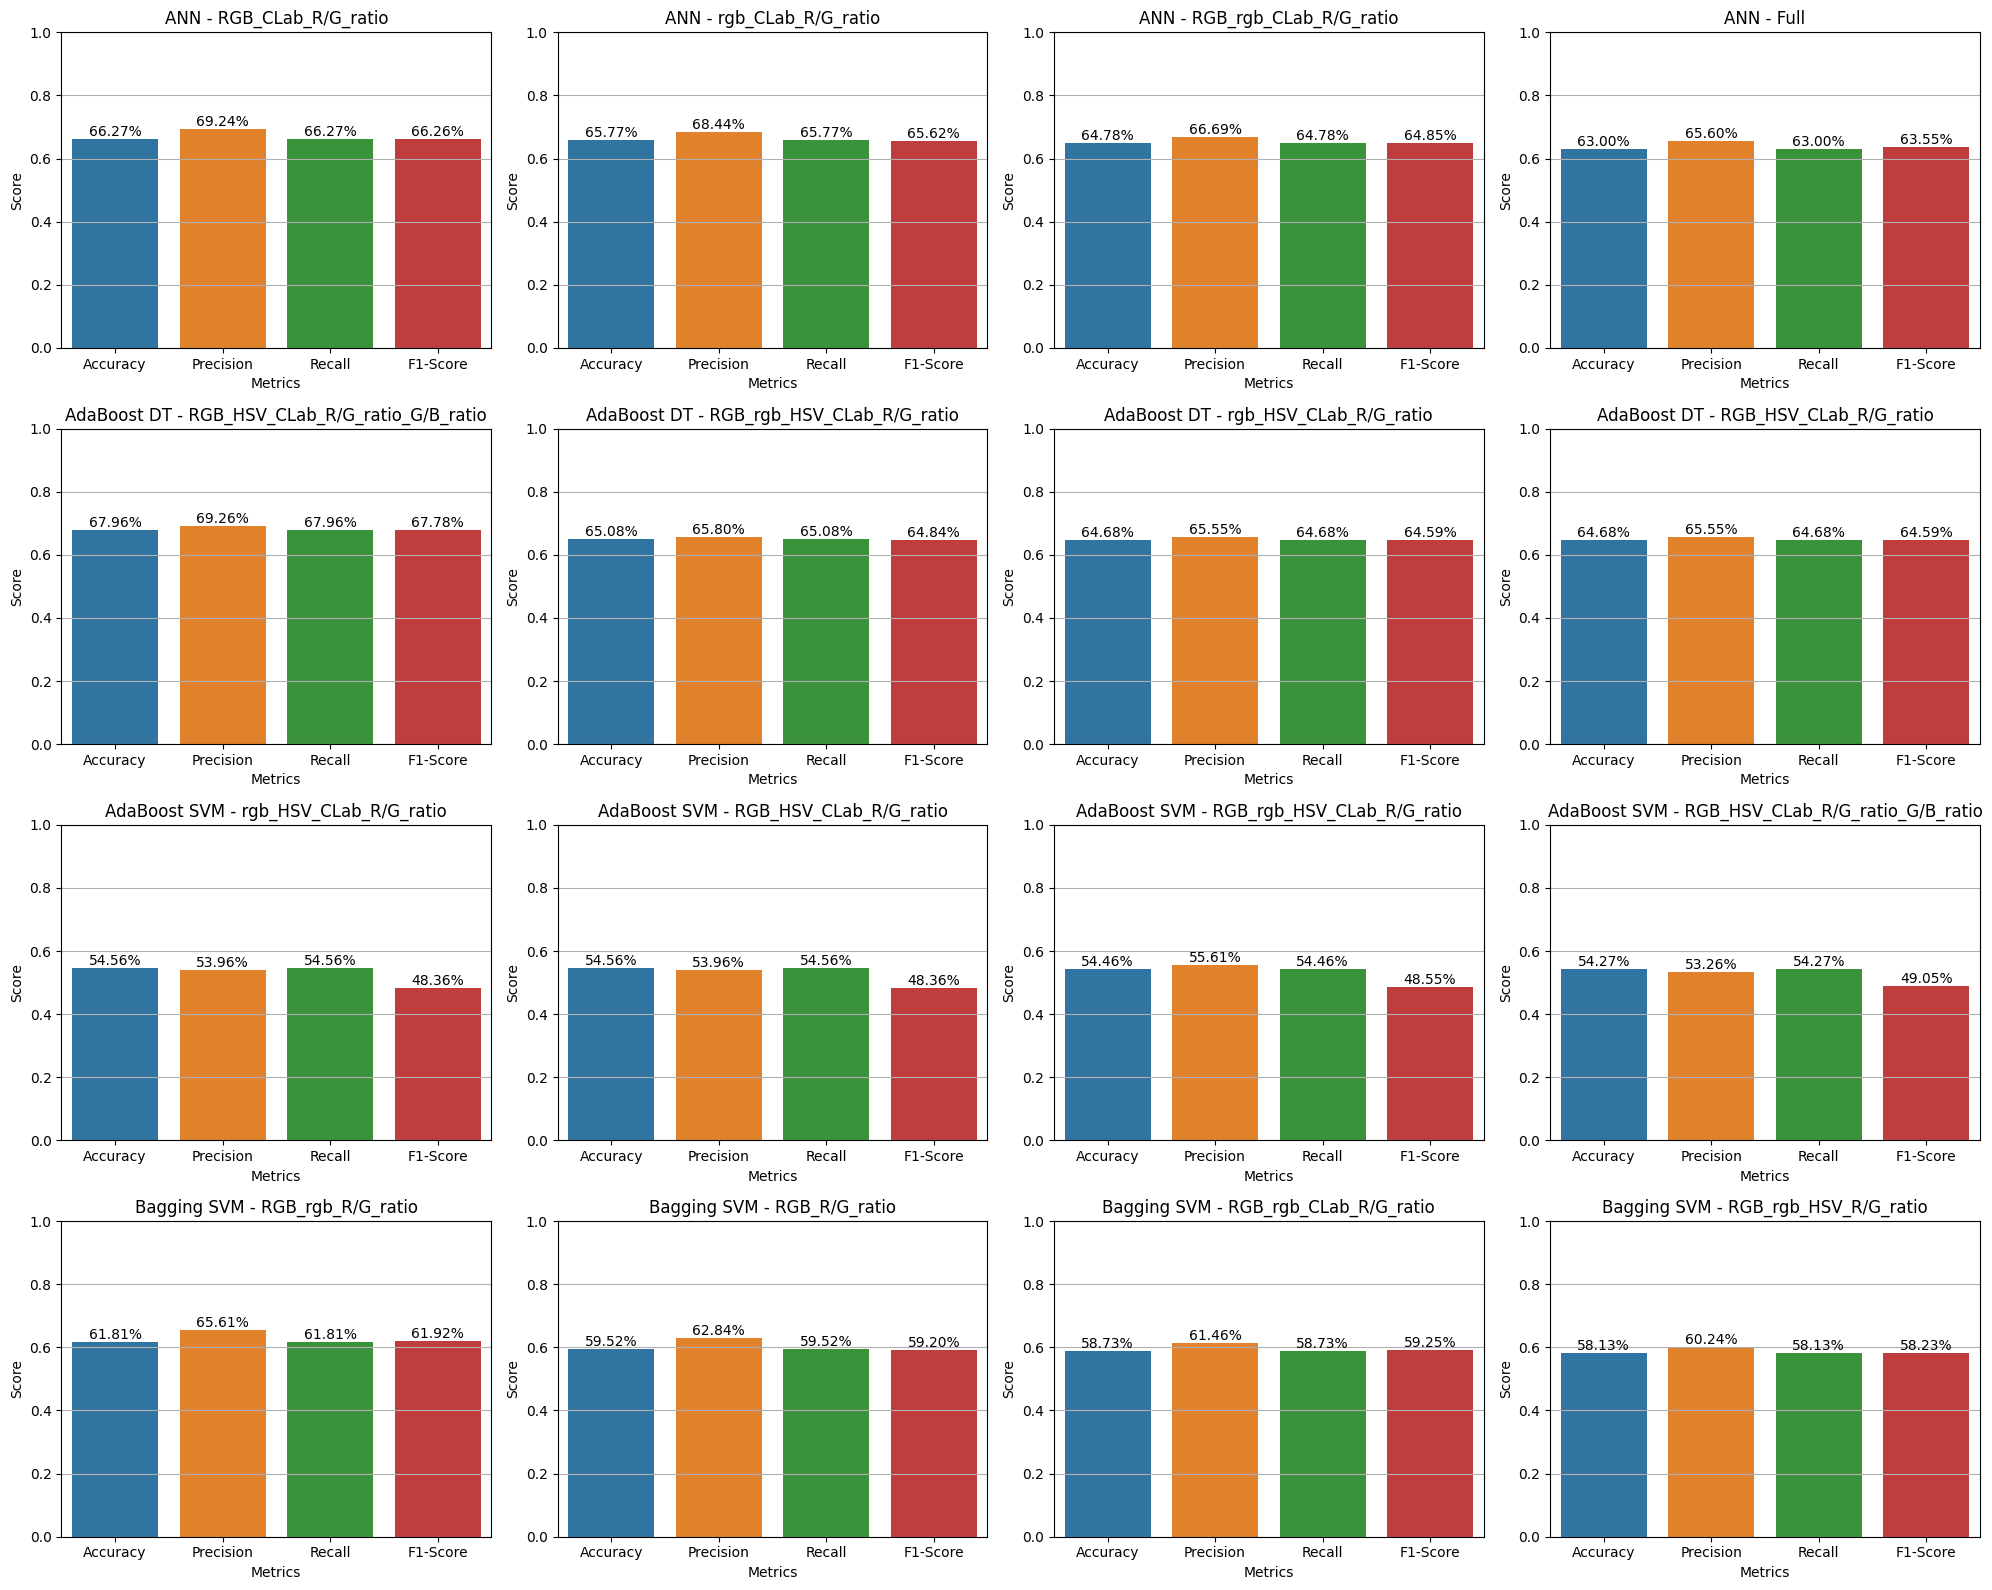

In [90]:
visualize_model_feature_metrics(
    metrics_dict=metrics_dicts_tuned_cv,
    model_names=model_names_tuned,
)

### **Final Model**

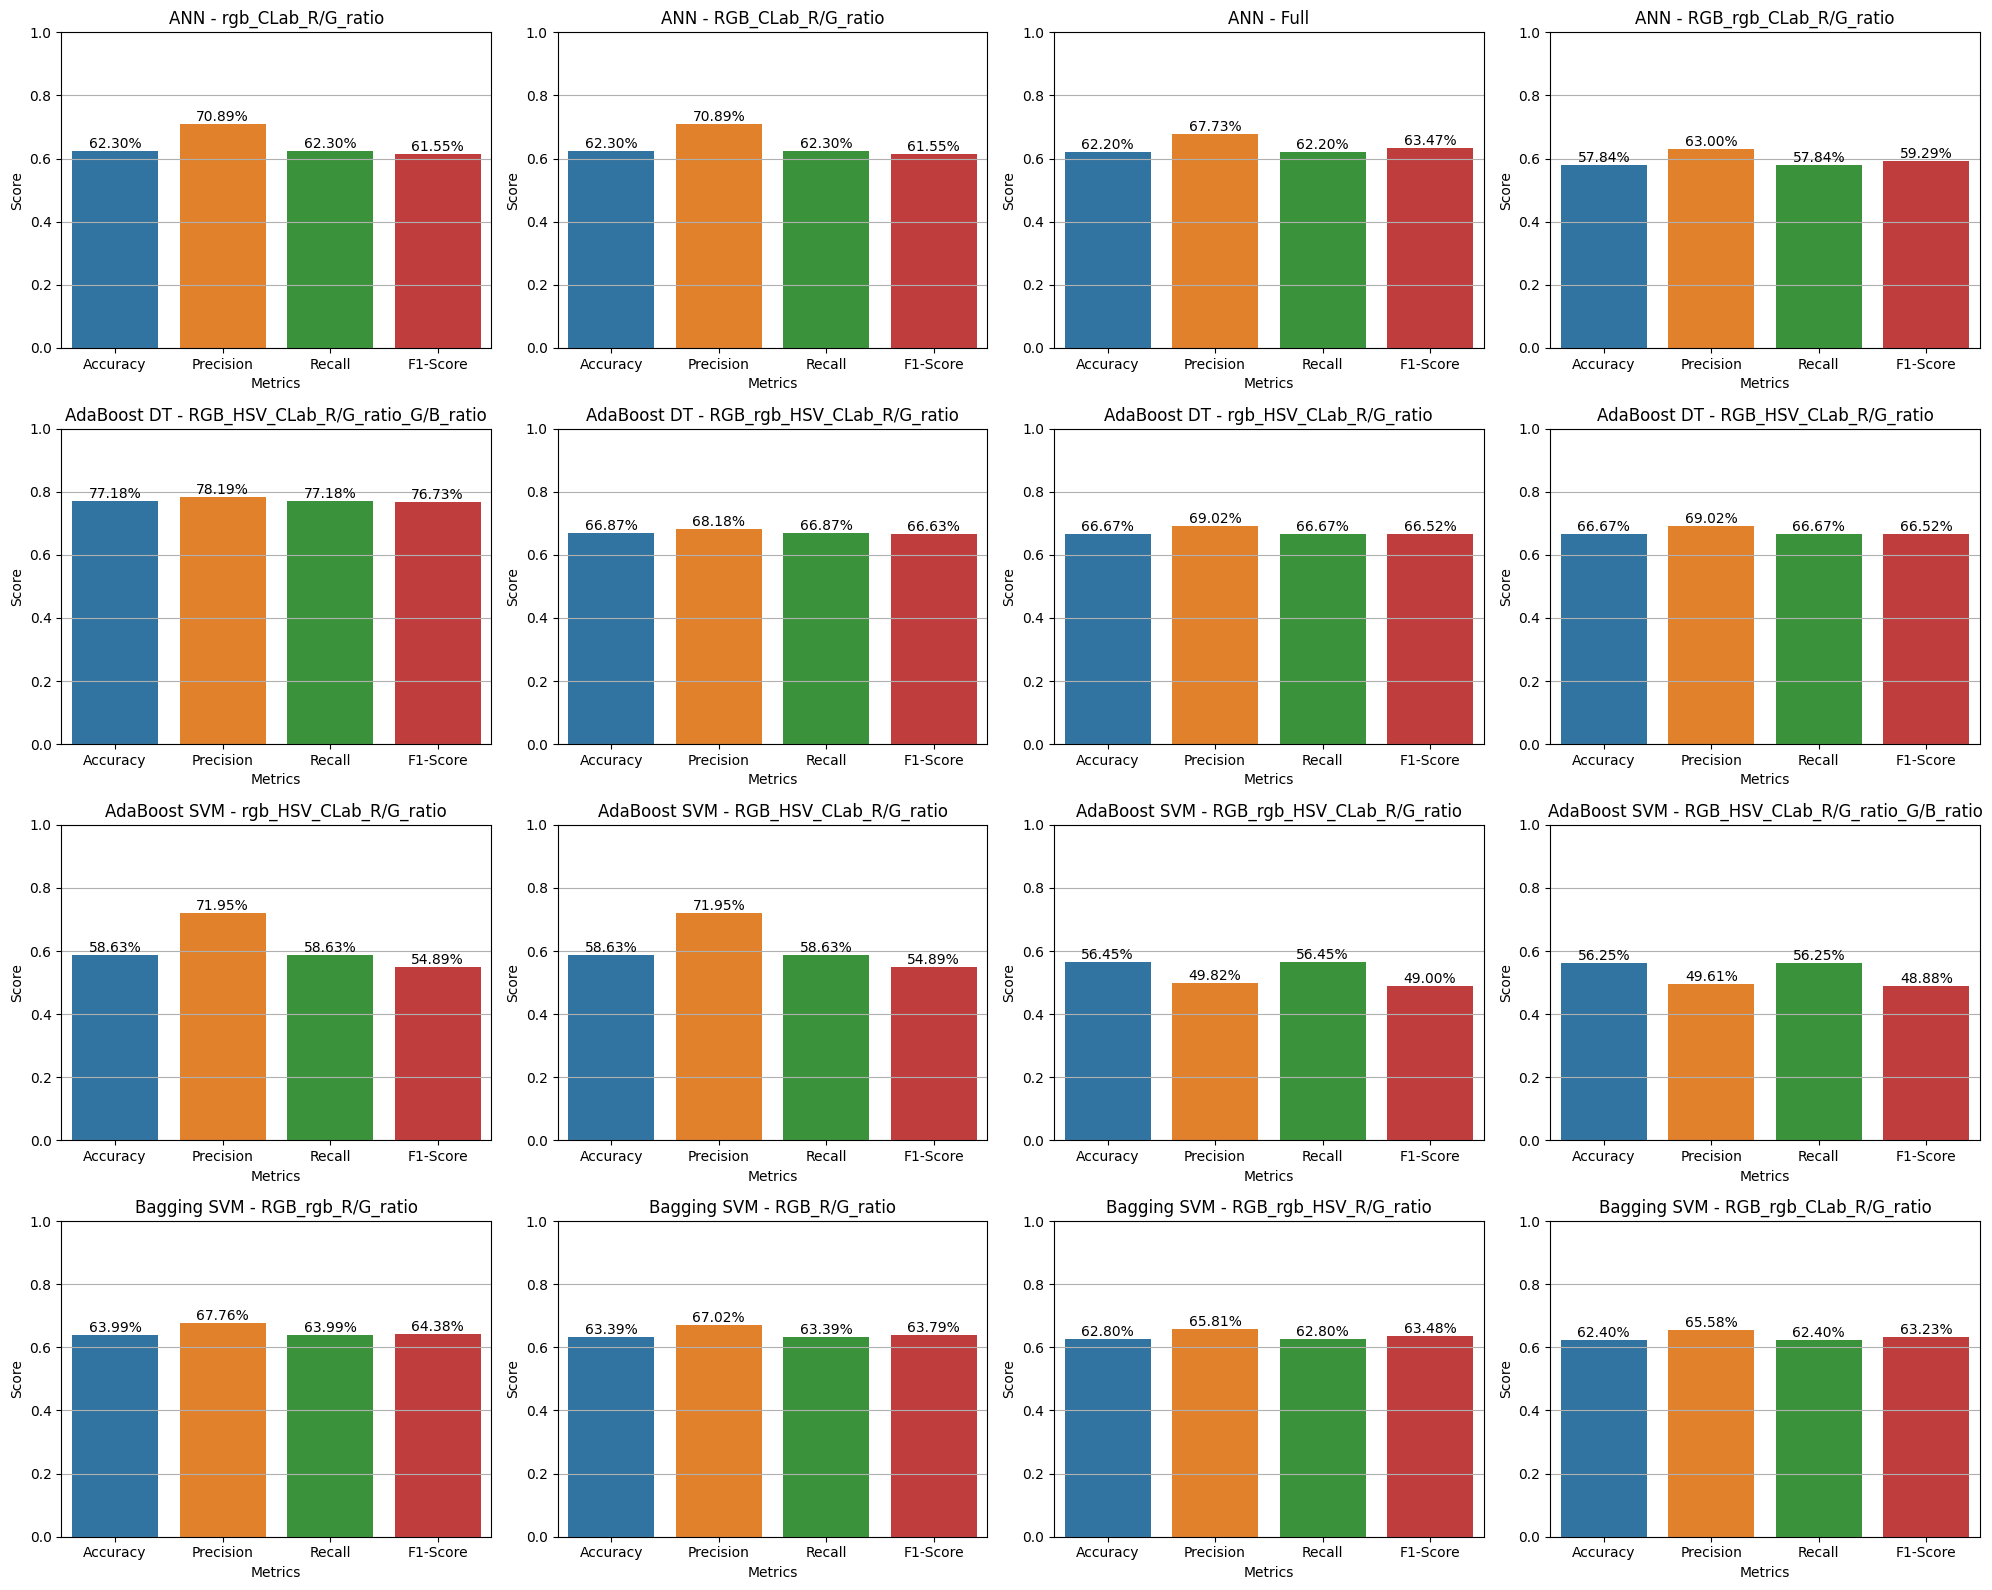

In [91]:
visualize_model_feature_metrics(
    metrics_dict=metrics_dicts_tuned_final,
    model_names=model_names_tuned,
)